In [1]:
%load_ext autoreload
%autoreload 2
import h5py
import emcee
import dynesty
import corner
import pandas as pd
import numpy as np
import arviz as az
import json
import chainconsumer
from matplotlib.lines import Line2D
import sys
sys.path.insert(0, '/Users/smericks/Desktop/StrongLensing/darkenergy-from-LAGN/')
import tdc_sampler
from Utils.inference_utils import median_sigma_from_samples
from Utils.mcmc_utils import median_and_uncertainty, twoD_area, DE_fom
import Experiments.lsst_forecast.DataVectors.prep_data_vectors as prep_data_vectors

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcdefaults()

Load in chains from Sherlock

In [17]:
"""
'exp1_1':{
    'lcdm':{},
    'w0wa2':{},
},
'exp1_2':{
    'lcdm':{},
    'w0wa2':{},
},
"""
chains_dict = {
    'exp0_2':{
        'w0wa_seed1':{},
        'w0wa_seed2':{},
        'w0wa_seed3':{},
        'w0wa_seed4':{},
        'w0wa_seed4_no_jackpot':{},
        'w0wa_seed5':{},
        'TESTSEED1_w0wa_seed6':{},
        'TESTSEED2_w0wa_seed6':{},
        'TESTSEED3_w0wa_seed6':{},
        'w0wa_seed6':{},
        'w0wa_seed6_LONG':{},
        'w0wa_seed6_GAMMA':{},
        'w0wa_seed7':{},
        'w0wa_seed8':{},
        'w0wa_seed9':{},
        'w0wa_seed10':{},
        'w0wa_seed1_pantheonOM':{},
        'w0wa_seed2_pantheonOM':{},
        'w0wa_seed3_pantheonOM':{},
        'w0wa_seed4_pantheonOM':{},
        'w0wa_seed5_pantheonOM':{},
        'w0wa_seed6_pantheonOM':{},
        'w0wa_seed7_pantheonOM':{},
        'w0wa_seed8_pantheonOM':{},
        'w0wa_seed9_pantheonOM':{},
        'w0wa_seed10_pantheonOM':{},
        'w0wa_seed1_TdcosmoPrior':{},
        'w0wa_seed6_TdcosmoPrior':{},
        'w0wa_initseed1_seed6':{},
        'w0wa_initseed2_seed6':{},
        'w0wa_initseed3_seed6':{},
        'w0wa_initseed4_seed6':{},
        'w0wa_initseed5_seed6':{},
        'w0wa_initseed6_seed6':{},
        'w0wa_initseed7_seed6':{},
        'w0wa_initseed8_seed6':{},
        'w0wa_initseed9_seed6':{},
        'w0wa_initseed10_seed6':{},
        'w0wa_seed3_10k_fpd':{},
        'w0wa_seed4_10k_fpd':{},
        'w0wa_seed4_TdcosmoPrior':{},
        'w0wa_seed3_TdcosmoPrior':{},
        'w0wa_shajib_prior_seed6':{}
    },
    'exp1_2':{
        'w0wa_seed6':{},
        'w0wa_seed6_TdcosmoPrior':{},
    },
    'exp1_3':{
        'w0wa_seed6':{},
        'w0wa_seed1_OmegaM':{},
        'w0wa_seed2_OmegaM':{},
        'w0wa_seed3_OmegaM':{},
        'w0wa_seed4_OmegaM':{},
        'w0wa_seed5_OmegaM':{},
        'w0wa_seed6_OmegaM':{},
        'w0wa_seed7_OmegaM':{},
        'w0wa_seed8_OmegaM':{},
        'w0wa_seed9_OmegaM':{},
        'w0wa_seed10_OmegaM':{},
        'w0wa_seed1_widerw0wa':{},
        'w0wa_seed2_widerw0wa':{},
        'w0wa_seed3_widerw0wa':{},
        'w0wa_seed4_widerw0wa':{},
        'w0wa_seed5_widerw0wa':{},
        'w0wa_seed6_widerw0wa':{},
        'w0wa_seed7_widerw0wa':{},
        'w0wa_seed6_TdcosmoPrior':{},
    },
    'exp2_1':{
        'w0wa_seed6_LONG':{},
    },
    'exp2_2':{
        'w0wa_seed6_LONG':{},
    },
    'exp4_1':{
        'w0wa_seed6_LONG':{},
    },
    'exp4_2':{
        'w0wa_seed6_LONG':{},
    },
    'exp4_3':{
        'w0wa_seed6_LONG':{},
    },
    'exp5_1':{
        'w0wa_seed6_LONG':{}
    },
    'exp5_2':{
        'w0wa_seed6_LONG':{}
    },
    'exp5_3':{
        'w0wa_seed6_LONG':{}
    },
    'exp5_4':{
        'w0wa_seed6_LONG':{}
    },
}

for exp in chains_dict.keys():
    exp_dict = chains_dict[exp]
    for cosmo in exp_dict.keys():
        chain_path = 'InferenceRuns/'+exp+'/'+''+cosmo+'_backend.h5'
        print(chain_path)
        reader = emcee.backends.HDFBackend(chain_path, read_only=True)
        chains_dict[exp][cosmo]['chain'] = reader.get_chain()


InferenceRuns/exp0_2/w0wa_seed1_backend.h5
InferenceRuns/exp0_2/w0wa_seed2_backend.h5
InferenceRuns/exp0_2/w0wa_seed3_backend.h5
InferenceRuns/exp0_2/w0wa_seed4_backend.h5
InferenceRuns/exp0_2/w0wa_seed4_no_jackpot_backend.h5
InferenceRuns/exp0_2/w0wa_seed5_backend.h5
InferenceRuns/exp0_2/TESTSEED1_w0wa_seed6_backend.h5
InferenceRuns/exp0_2/TESTSEED2_w0wa_seed6_backend.h5
InferenceRuns/exp0_2/TESTSEED3_w0wa_seed6_backend.h5
InferenceRuns/exp0_2/w0wa_seed6_backend.h5
InferenceRuns/exp0_2/w0wa_seed6_LONG_backend.h5
InferenceRuns/exp0_2/w0wa_seed6_GAMMA_backend.h5
InferenceRuns/exp0_2/w0wa_seed7_backend.h5
InferenceRuns/exp0_2/w0wa_seed8_backend.h5
InferenceRuns/exp0_2/w0wa_seed9_backend.h5
InferenceRuns/exp0_2/w0wa_seed10_backend.h5
InferenceRuns/exp0_2/w0wa_seed1_pantheonOM_backend.h5
InferenceRuns/exp0_2/w0wa_seed2_pantheonOM_backend.h5
InferenceRuns/exp0_2/w0wa_seed3_pantheonOM_backend.h5
InferenceRuns/exp0_2/w0wa_seed4_pantheonOM_backend.h5
InferenceRuns/exp0_2/w0wa_seed5_pantheonOM_

### EXTERNAL: Load in chain from Shajib '24 ###

In [6]:
with h5py.File('Inferenceruns/Shajib_lensed_quasar_w0waCDM.h5','r') as h5:
    print(h5['mcmc'].keys())
    shajib24_accepted = h5['mcmc']['accepted'][:]
    shajib24_chain = h5['mcmc']['chain'][:]

<KeysViewHDF5 ['accepted', 'chain', 'log_prob']>


### Figure 1 ####

50 IFU Lenses
71.684  +  2.706  -  2.64
arviz (68 hdi / 2) 2.654
0.354  +  0.065  -  0.097
arviz (68 hdi / 2) 0.075
pivot redshift:  0.042975626513380875
DE FOM:  2.402440832676932
+150 Gold Lenses
71.369  +  2.369  -  2.284
arviz (68 hdi / 2) 2.31
0.324  +  0.065  -  0.1
arviz (68 hdi / 2) 0.076
pivot redshift:  0.09033564029252843
DE FOM:  2.9284450665330732
+600 LSST Lenses
71.047  +  1.777  -  1.668
arviz (68 hdi / 2) 1.706
0.249  +  0.077  -  0.092
arviz (68 hdi / 2) 0.082
pivot redshift:  0.1648161040480385
DE FOM:  6.72525644272284


/var/folders/3c/zhqnlycn2w55xc2klqyt43v80000gn/T/ipykernel_27107/1709758949.py:80: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


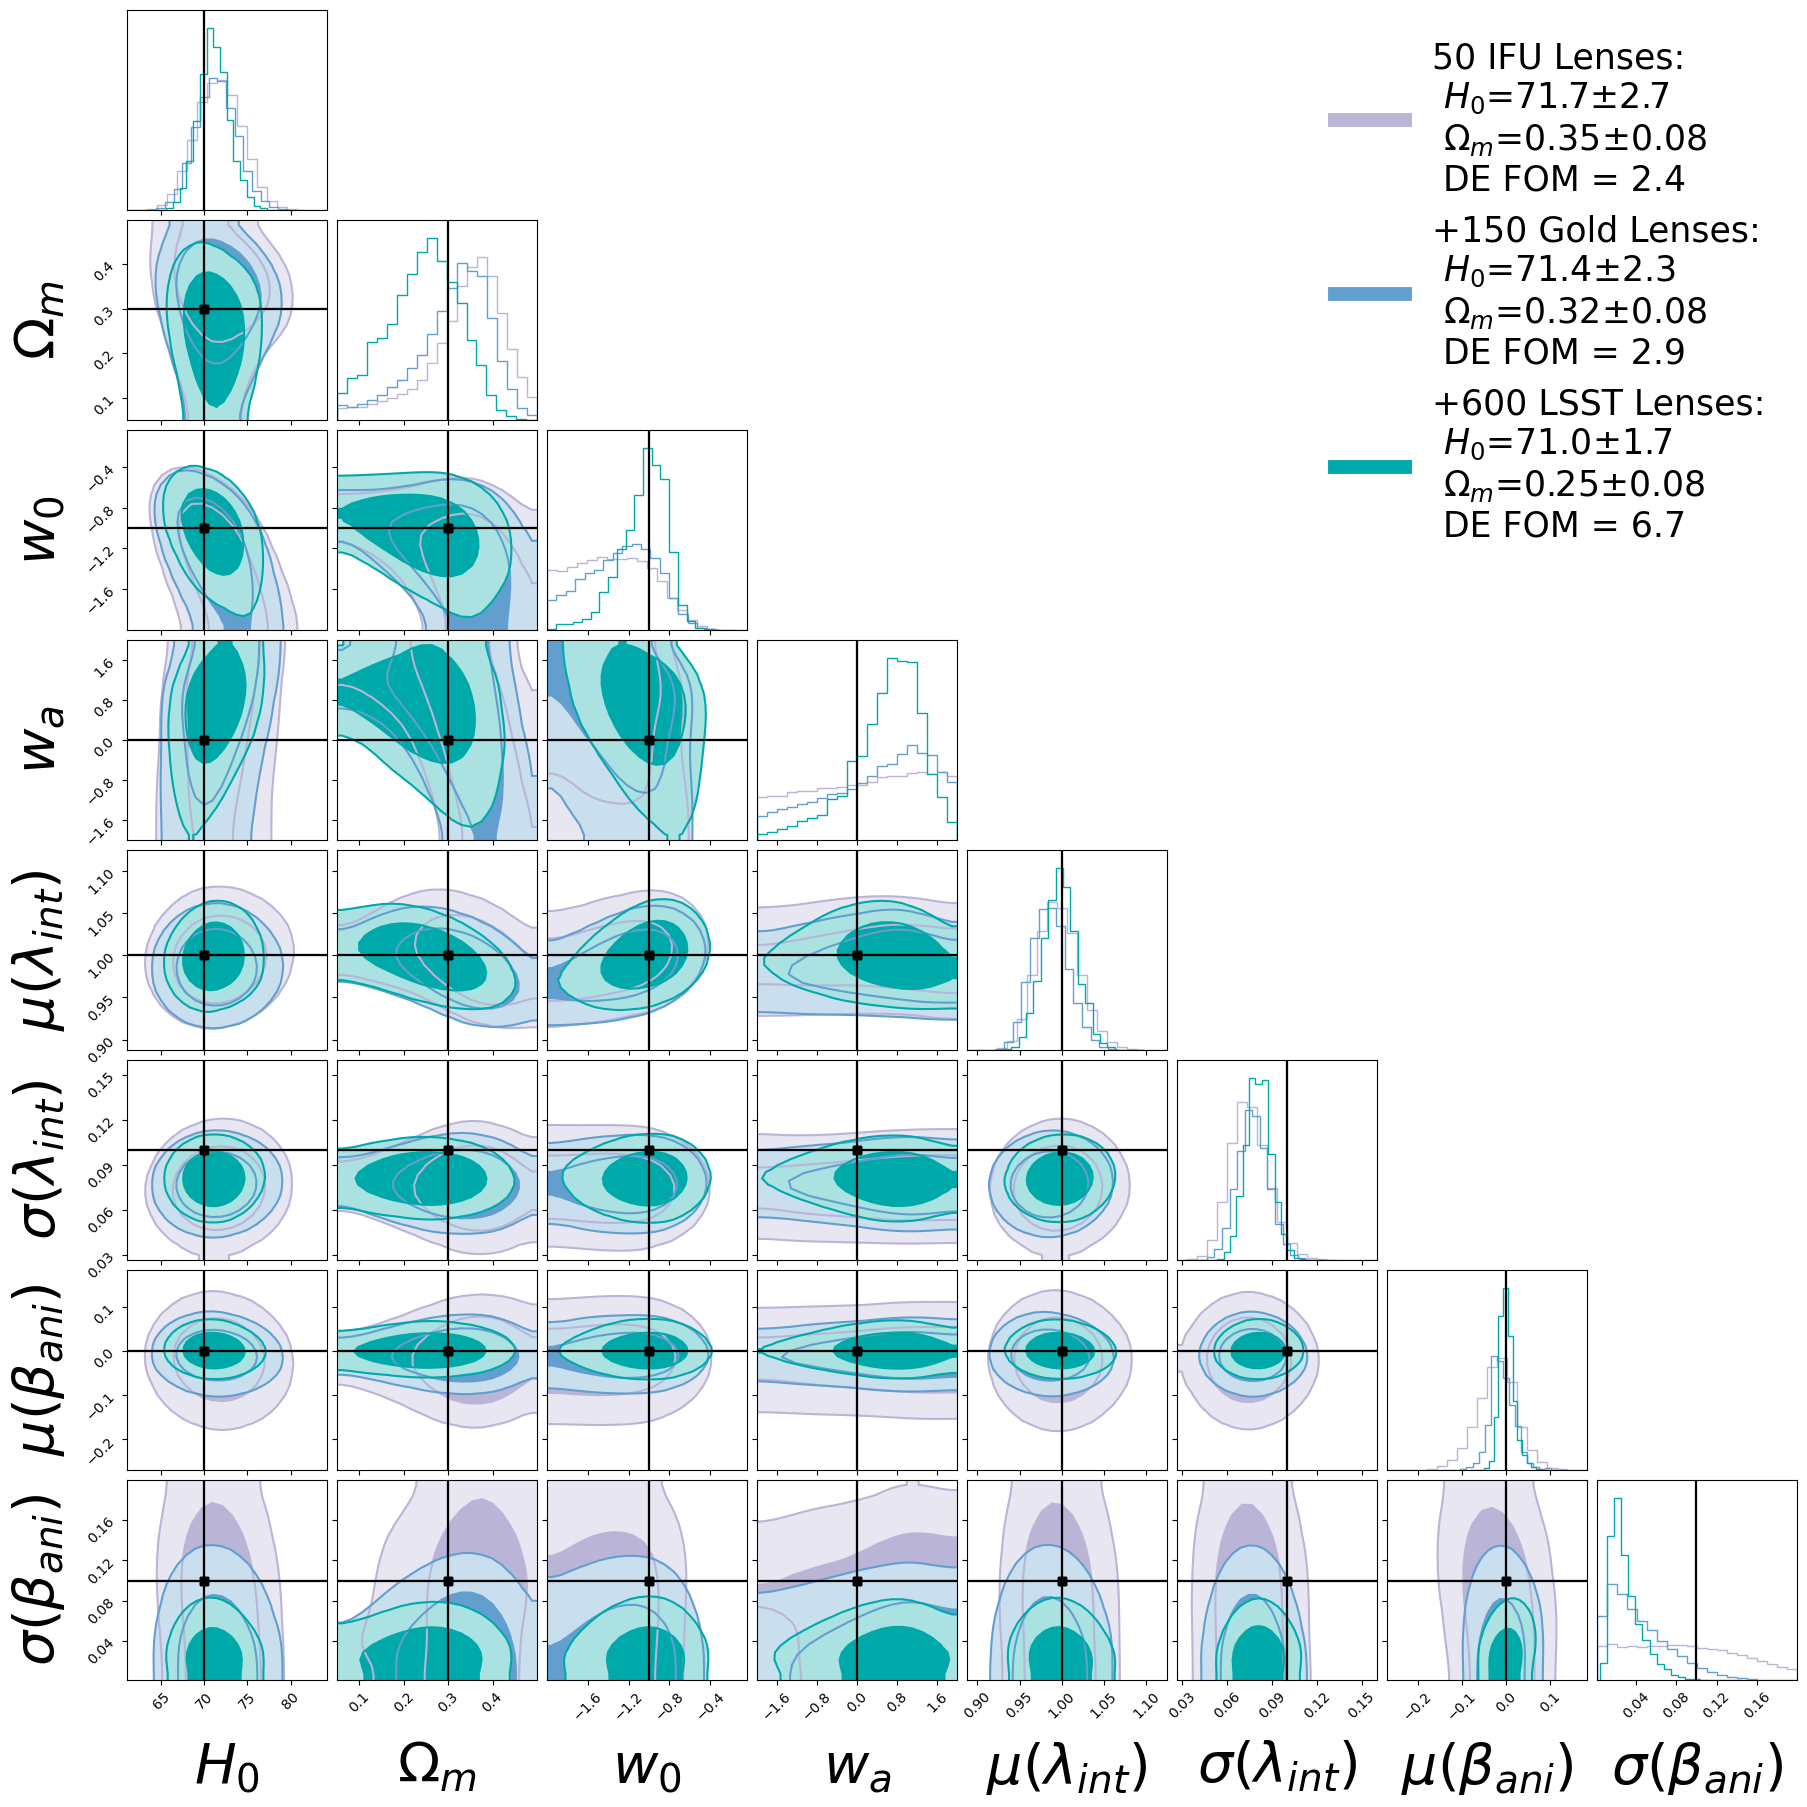

In [4]:
exp_chains = [
    np.transpose(chains_dict['exp1_3']['w0wa_seed6']['chain'],axes=(1,0,2)),
    np.transpose(chains_dict['exp1_2']['w0wa_seed6']['chain'],axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed6_LONG']['chain'][:70000],axes=(1,0,2))]
exp_names = ['50 IFU Lenses',
            '+150 Gold Lenses',
             '+600 LSST Lenses']
             #'Exp 0.2: Baseline, Seed 1, Steps 32k-44k']

num_chains = len(exp_chains)
burnin = [10000,10000,20000]
cmap = plt.get_cmap('ocean')
colors = ["#BAB4D7","#629FCE","#00A9A9"] #goldenrod',
truth_colors = ["#000000"] * num_chains

custom_lines = []
custom_labels = []

for i,exp_chain in enumerate(exp_chains):

    num_params = exp_chain.shape[2]

    my_color = colors[i]
    
    print(exp_names[i])
    median_and_uncertainty(exp_chain,burnin[i])
    zp,fom = DE_fom(exp_chain,burnin[i])
     
    if i ==0:

        figure = corner.corner(exp_chain[:,burnin[i]:,:-2].reshape((-1,exp_chain.shape[2]-2)),plot_datapoints=False,
            color=my_color,levels=[0.68,0.95],fill_contours=True,
            labels= ['$H_0$','$\Omega_m$','$w_0$','$w_a$',
                r'$\mu(\lambda_{int})$',r'$\sigma(\lambda_{int})$',
                r'$\mu(\beta_{ani})$',r'$\sigma(\beta_{ani})$'],
            dpi=300,truths=[70.,0.3,-1.0,0.,
                1.,0.1,0.,0.1],truth_color=truth_colors[i],
            fig=None,label_kwargs={'fontsize':40},smooth=2)

    else:

        corner.corner(exp_chain[:,burnin[i]:,:-2].reshape((-1,exp_chain.shape[2]-2)),plot_datapoints=False,
            color=my_color,levels=[0.68,0.95],fill_contours=True,
            labels=['$H_0$','$\Omega_m$','$w_0$','$w_a$',
                r'$\mu(\lambda_{int})$',r'$\sigma(\lambda_{int})$',
                r'$\mu(\beta_{ani})$',r'$\sigma(\beta_{ani})$'],
            dpi=300,truths=[70.,0.3,-1.0,0.,
                1.,0.1,0.,0.1],truth_color=truth_colors[i],
            fig=figure,label_kwargs={'fontsize':40},smooth=2)
        
    custom_lines.append(Line2D([0], [0], color=my_color, lw=10))

    # calculate h0 constraint
    h0, h0_sigma = median_sigma_from_samples(exp_chain[:,burnin[i]:,0].reshape((-1,1)),weights=None)
    OmegaM, OmegaM_sigma = median_sigma_from_samples(exp_chain[:,burnin[i]:,1].reshape((-1,1)),weights=None)
    w0, w0_sigma = median_sigma_from_samples(exp_chain[:,burnin[i]:,2].reshape((-1,1)),weights=None)
    wa, wa_sigma = median_sigma_from_samples(exp_chain[:,burnin[i]:,3].reshape((-1,1)),weights=None)
    # construct label
    custom_labels.append(exp_names[i]+
        ':\n $H_0$=%.1f$\pm$%.1f \n $\Omega_m$=%.2f$\pm$%.2f \n DE FOM = %.1f'%(
        np.round(h0,decimals=1), np.round(h0_sigma,decimals=1), 
        np.round(OmegaM,decimals=2), np.round(OmegaM_sigma,decimals=2), 
        np.round(fom,decimals=1)))

"""
axes = np.array(figure.axes).reshape((3, 3))
bounds = [[63,77],[1.91,2.095],[0.0,0.2]]
for r in range(0,3):
        for c in range(0,r+1):
            if bounds is not None:
                axes[r,c].set_xlim(bounds[c])
                if r != c :
                    axes[r,c].set_ylim(bounds[r])

axes = np.array(figure.axes).reshape((3, 3))
"""

axes = np.array(figure.axes).reshape((num_params-2, num_params-2))
axes[0,num_params-3].legend(custom_lines,custom_labels,frameon=False,fontsize=25)
plt.tight_layout()
plt.savefig('/Users/smericks/Desktop/gold_vs_silver.pdf',bbox_inches='tight')

### Modified Figure 1 ###

50 IFU Lenses
50 IFU Lenses
pivot redshift:  0.04061536970303211
DE FOM:  2.41152738878127
+750 LSST Lenses
+750 LSST Lenses
pivot redshift:  0.1664221606414045
DE FOM:  6.7630147926410995


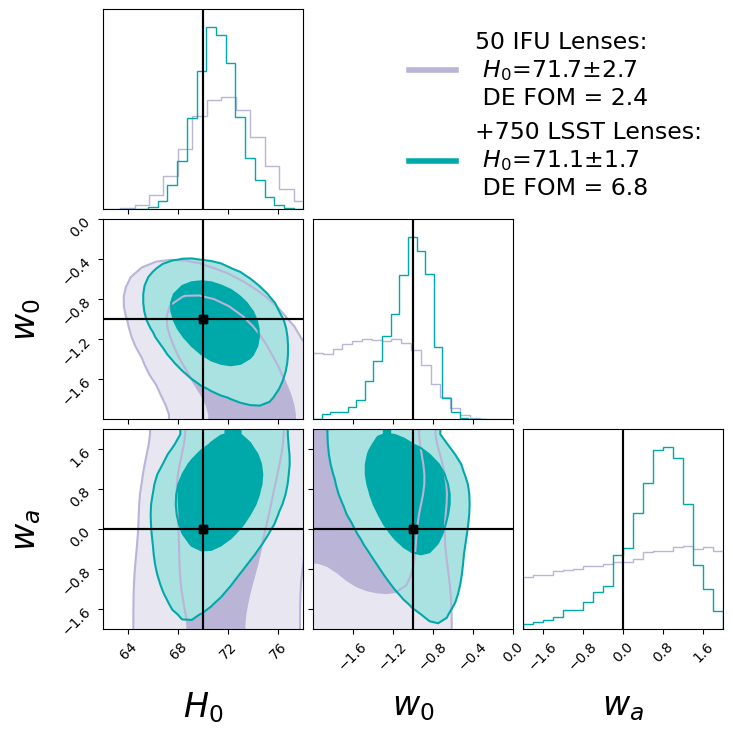

In [10]:
exp_chains = [
    np.transpose(chains_dict['exp1_3']['w0wa_seed6']['chain'],axes=(1,0,2))[:,:70000,:4],
   # np.transpose(chains_dict['exp1_2']['w0wa_seed6']['chain'],axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed6_LONG']['chain'][:70000],axes=(1,0,2))[:,:70000,:4]]
exp_names = ['50 IFU Lenses',
             '+750 LSST Lenses']

num_chains = len(exp_chains)
burnin = [10000,10000,20000]
colors = ["#BAB4D7","#00A9A9"] #goldenrod', # "#629FCE"
truth_colors = ["#000000"] * num_chains

custom_lines = []
custom_labels = []

for i,exp_chain in enumerate(exp_chains):

    num_params = exp_chain.shape[2]

    my_color = colors[i]
    
    print(exp_names[i])
    #median_and_uncertainty(exp_chain,burnin[i])
    print(exp_names[i])
    zp,fom = DE_fom(exp_chain,burnin[i])
     
    if i ==0:

        figure = corner.corner(exp_chain[:,burnin[i]:,[0,2,3]].reshape((-1,3)),plot_datapoints=False,
            color=my_color,levels=[0.68,0.95],fill_contours=True,
            labels= ['$H_0$','$w_0$','$w_a$'],
            dpi=300,truths=[70.,-1.0,0.],truth_color=truth_colors[i],
            fig=None,label_kwargs={'fontsize':24},hist_kwargs={'density':True},
            smooth=2)

    else:

        corner.corner(exp_chain[:,burnin[i]:,[0,2,3]].reshape((-1,3)),plot_datapoints=False,
            color=my_color,levels=[0.68,0.95],fill_contours=True,
            labels=['$H_0$','$w_0$','$w_a$'],
            dpi=300,truths=[70.,-1.0,0.],truth_color=truth_colors[i],
            fig=figure,label_kwargs={'fontsize':24},hist_kwargs={'density':True},
            smooth=2)
        
    custom_lines.append(Line2D([0], [0], color=my_color, lw=4))

    # calculate h0 constraint
    h0, h0_sigma = median_sigma_from_samples(exp_chain[:,burnin[i]:,0].reshape((-1,1)),weights=None)
    OmegaM, OmegaM_sigma = median_sigma_from_samples(exp_chain[:,burnin[i]:,1].reshape((-1,1)),weights=None)
    w0, w0_sigma = median_sigma_from_samples(exp_chain[:,burnin[i]:,2].reshape((-1,1)),weights=None)
    wa, wa_sigma = median_sigma_from_samples(exp_chain[:,burnin[i]:,3].reshape((-1,1)),weights=None)
    # construct label
    custom_labels.append(exp_names[i]+
        ':\n $H_0$=%.1f$\pm$%.1f \n DE FOM = %.1f'%(
        h0, h0_sigma, fom))


axes = np.array(figure.axes).reshape((3, 3))
bounds = [[62,78],[-2,0.],[-2,2]]
for r in range(0,3):
        for c in range(0,r+1):
            if bounds is not None:
                axes[r,c].set_xlim(bounds[c])
                if r != c :
                    axes[r,c].set_ylim(bounds[r])

#axes = np.array(figure.axes).reshape((3, 3))


axes[0,2].legend(custom_lines,custom_labels,frameon=False,fontsize=17)
plt.savefig('/Users/smericks/Desktop/isolated_contours.pdf')

### Figure 5 ###

Shajib 2025: 236 Lenses
Shajib 2025: 236 Lenses
pivot redshift:  0.15174157499698798
DE FOM:  9.534800683542048
Exp 0.1: Baseline, 800 Lenses
Exp 0.1: Baseline, 800 Lenses
pivot redshift:  0.16456957575431644
DE FOM:  6.725857520193819
Exp 3.1: Extra LTM, 800 Lenses
Exp 3.1: Extra LTM, 800 Lenses
pivot redshift:  0.21253723288249157
DE FOM:  12.140126754066939


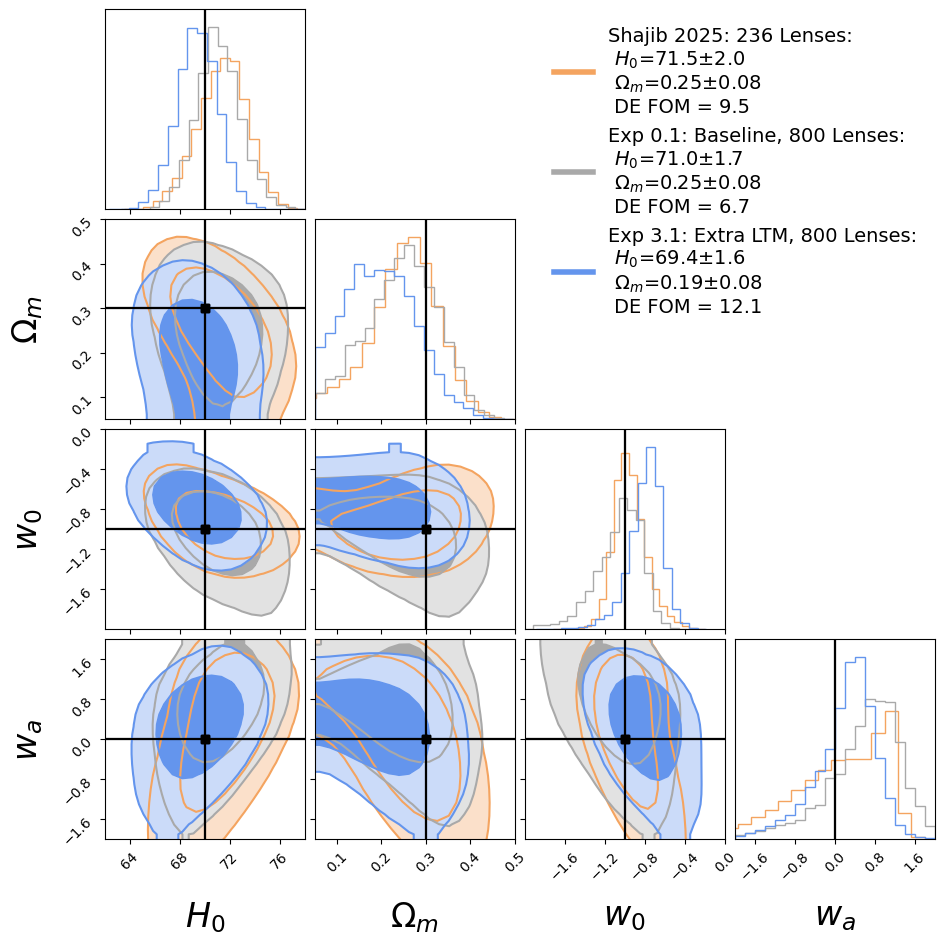

In [7]:
exp_chains = [
    np.transpose(shajib24_chain,axes=(1,0,2))[:,:,:4],
    np.transpose(chains_dict['exp0_2']['w0wa_seed6_LONG']['chain'],axes=(1,0,2))[:,:70000,:4],
    np.transpose(chains_dict['exp5_1']['w0wa_seed6_LONG']['chain'],axes=(1,0,2))[:,:70000,:4]]
burnin = [10000,20000,20000]

exp_names = ['Shajib 2025: 236 Lenses',
            #'Exp 1.2: Gold-Only, Seed 0',
             'Exp 0.1: Baseline, 800 Lenses',
             'Exp 3.1: Extra LTM, 800 Lenses']
             #'Exp 0.2: Baseline, Seed 1, Steps 32k-44k']
colors = ['sandybrown','darkgrey','cornflowerblue'] #goldenrod',
truth_colors = ["#000000"] * len(exp_names)

custom_lines = []
custom_labels = []

for i,exp_chain in enumerate(exp_chains):

    num_params = exp_chain.shape[2]

    my_color = colors[i]
    
    print(exp_names[i])
    #median_and_uncertainty(exp_chain,burnin[i])
    print(exp_names[i])
    zp,fom = DE_fom(exp_chain,burnin[i])
     
    if i ==0:

        figure = corner.corner(exp_chain[:,burnin[i]:].reshape((-1,exp_chain.shape[2])),plot_datapoints=False,
            color=my_color,levels=[0.68,0.95],fill_contours=True,
            labels= ['$H_0$','$\Omega_m$','$w_0$','$w_a$'],
            dpi=300,truths=[70.,0.3,-1.0,0.],truth_color=truth_colors[i],
            fig=None,label_kwargs={'fontsize':24},hist_kwargs={'density':True},
            smooth=2)

    else:

        corner.corner(exp_chain[:,burnin[i]:].reshape((-1,exp_chain.shape[2])),plot_datapoints=False,
            color=my_color,levels=[0.68,0.95],fill_contours=True,
            labels=['$H_0$','$\Omega_m$','$w_0$','$w_a$'],
            dpi=300,truths=[70.,0.3,-1.0,0.],truth_color=truth_colors[i],
            fig=figure,label_kwargs={'fontsize':24},hist_kwargs={'density':True},
            smooth=2)
        
    custom_lines.append(Line2D([0], [0], color=my_color, lw=4))

    # calculate h0 constraint
    h0, h0_sigma = median_sigma_from_samples(exp_chain[:,burnin[i]:,0].reshape((-1,1)),weights=None)
    OmegaM, OmegaM_sigma = median_sigma_from_samples(exp_chain[:,burnin[i]:,1].reshape((-1,1)),weights=None)
    w0, w0_sigma = median_sigma_from_samples(exp_chain[:,burnin[i]:,2].reshape((-1,1)),weights=None)
    wa, wa_sigma = median_sigma_from_samples(exp_chain[:,burnin[i]:,3].reshape((-1,1)),weights=None)
    # construct label
    custom_labels.append(exp_names[i]+
        ':\n $H_0$=%.1f$\pm$%.1f \n $\Omega_m$=%.2f$\pm$%.2f \n DE FOM = %.1f'%(
        h0, h0_sigma, OmegaM, OmegaM_sigma, fom))


axes = np.array(figure.axes).reshape((4, 4))
bounds = [[62,78],[0.05,0.5],[-2,0.],[-2,2]]
for r in range(0,4):
        for c in range(0,r+1):
            if bounds is not None:
                axes[r,c].set_xlim(bounds[c])
                if r != c :
                    axes[r,c].set_ylim(bounds[r])

#axes = np.array(figure.axes).reshape((3, 3))


axes = np.array(figure.axes).reshape((4, 4))
axes[0,3].legend(custom_lines,custom_labels,frameon=False,fontsize=14)
plt.savefig('/Users/smericks/Desktop/comp_to_shajib24.pdf')

Reproduce figure from Shajib '25

<KeysViewHDF5 ['accepted', 'chain', 'log_prob']>
chain shape:  (15146, 84, 6)
(84, 15146, 4)


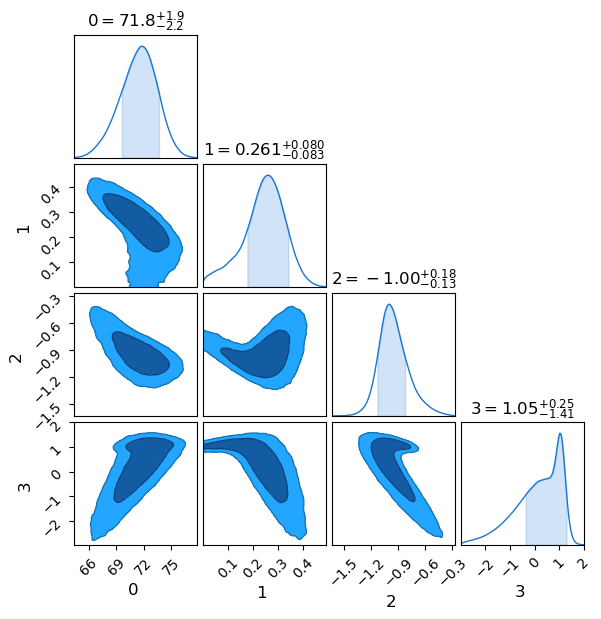

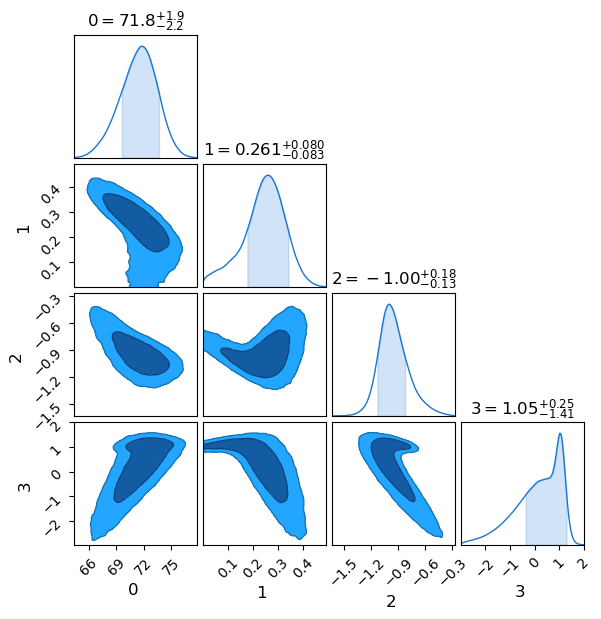

In [11]:
with h5py.File('Inferenceruns/Shajib_lensed_quasar_w0waCDM.h5','r') as h5:
    print(h5['mcmc'].keys())
    shajib24_accepted = h5['mcmc']['accepted'][:]
    shajib24_chain = h5['mcmc']['chain'][:]

print('chain shape: ', shajib24_chain.shape)


exp_chain = np.transpose(shajib24_chain,axes=(1,0,2))[:,:,:4]
burnin=1000

print(exp_chain.shape)
test_chain = exp_chain[:,burnin:].reshape((-1,exp_chain.shape[2]))
#print(test_chain.shape)
consumer = chainconsumer.ChainConsumer().add_chain(test_chain)
consumer.plotter.plot()

### Input for Table 6 ###

In [12]:
test_chain = np.transpose(chains_dict['exp0_2']['w0wa_seed6']['chain'],axes=(1,0,2))
burnin = 20000

chains = [
    np.transpose(chains_dict['exp0_2']['w0wa_seed6_LONG']['chain'][:70000],axes=(1,0,2)),
    np.transpose(chains_dict['exp2_1']['w0wa_seed6_LONG']['chain'][:70000],axes=(1,0,2)),
    np.transpose(chains_dict['exp2_2']['w0wa_seed6_LONG']['chain'][:70000],axes=(1,0,2)),
    np.transpose(chains_dict['exp4_1']['w0wa_seed6_LONG']['chain'][:70000],axes=(1,0,2)),
    np.transpose(chains_dict['exp4_2']['w0wa_seed6_LONG']['chain'][:70000],axes=(1,0,2)),
    np.transpose(chains_dict['exp4_3']['w0wa_seed6_LONG']['chain'][:70000],axes=(1,0,2)),
    np.transpose(chains_dict['exp5_1']['w0wa_seed6_LONG']['chain'][:70000],axes=(1,0,2)),
    np.transpose(chains_dict['exp5_2']['w0wa_seed6_LONG']['chain'][:70000],axes=(1,0,2)),
    np.transpose(chains_dict['exp5_3']['w0wa_seed6_LONG']['chain'][:70000],axes=(1,0,2)),
    np.transpose(chains_dict['exp5_4']['w0wa_seed6_LONG']['chain'][:70000],axes=(1,0,2))
]

labels = ['exp0_2','exp2_1','exp2_2','exp4_1','exp4_2','exp4_3','exp5_1','exp5_2','exp5_3','exp5_4']

for j,curr_chain in enumerate(chains):
    print(labels[j])
    median_and_uncertainty(curr_chain,burnin)
    DE_fom(curr_chain,burnin)

exp0_2
71.047  +  1.777  -  1.668
arviz (68 hdi / 2) 1.706
0.249  +  0.077  -  0.092
arviz (68 hdi / 2) 0.082
pivot redshift:  0.16743253269865893
DE FOM:  6.698968403819571
exp2_1
69.695  +  1.434  -  1.429
arviz (68 hdi / 2) 1.372
0.239  +  0.086  -  0.104
arviz (68 hdi / 2) 0.094
pivot redshift:  0.14034636446440024
DE FOM:  9.030583014074757
exp2_2
70.46  +  1.712  -  1.804
arviz (68 hdi / 2) 1.687
0.223  +  0.075  -  0.095
arviz (68 hdi / 2) 0.083
pivot redshift:  0.20937909642187322
DE FOM:  8.851038056544008
exp4_1
73.016  +  2.009  -  2.038
arviz (68 hdi / 2) 2.001
0.324  +  0.047  -  0.066
arviz (68 hdi / 2) 0.052
pivot redshift:  0.07553404492433746
DE FOM:  3.5191056488290404
exp4_2
71.209  +  1.752  -  1.672
arviz (68 hdi / 2) 1.693
0.256  +  0.078  -  0.095
arviz (68 hdi / 2) 0.082
pivot redshift:  0.13787368083489665
DE FOM:  6.531893110245595
exp4_3
72.353  +  1.796  -  1.715
arviz (68 hdi / 2) 1.738
0.296  +  0.053  -  0.073
arviz (68 hdi / 2) 0.059
pivot redshift:  0.1

### Figure 3 ###

Exp 1.1: Extra IFU Kin., Seed 5
pivot redshift:  0.14003266581813986
DE FOM:  9.022319230830744
Exp 1.2: Extra Aperture Kin., Seed 5
pivot redshift:  0.21103154830503837
DE FOM:  8.928298104572372
Exp 3.1: Extra Time-Delay Monitoring, Seed 5
pivot redshift:  0.21410127268373594
DE FOM:  11.980171278550376
Exp 3.4: $\sigma(\Delta t)_{LSST}$ = 2 days, Seed 5
pivot redshift:  0.2333885752522868
DE FOM:  9.990098846982788


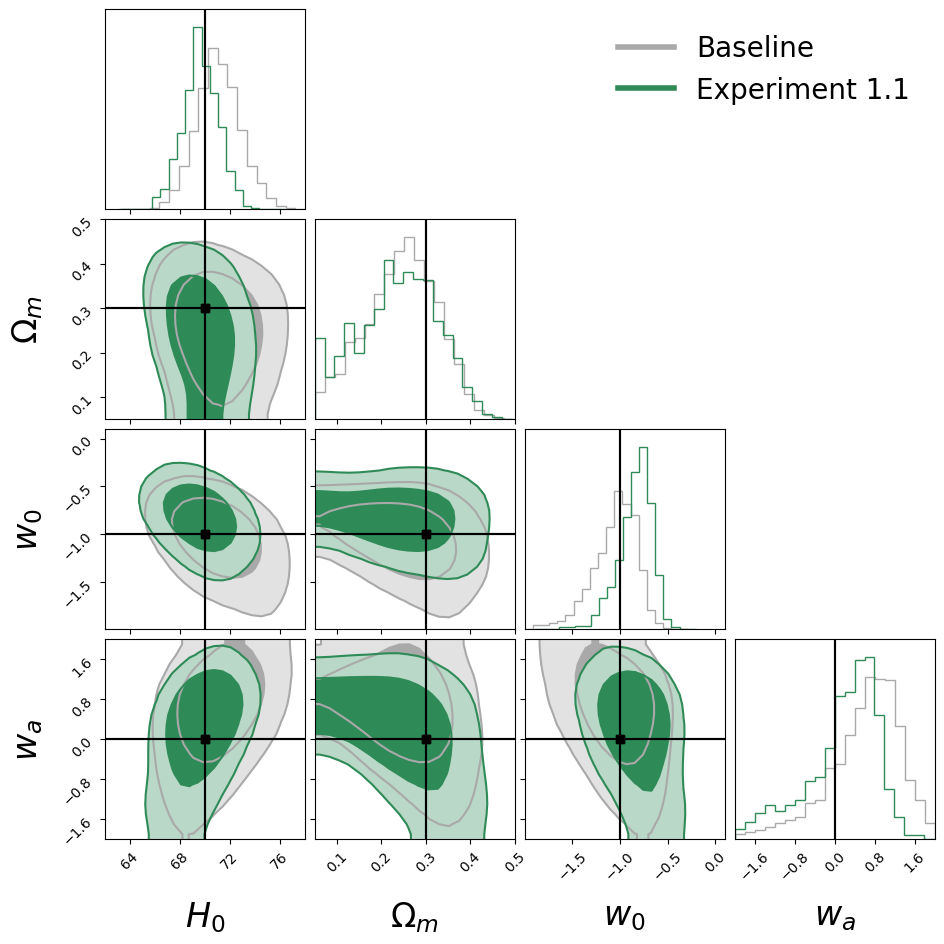

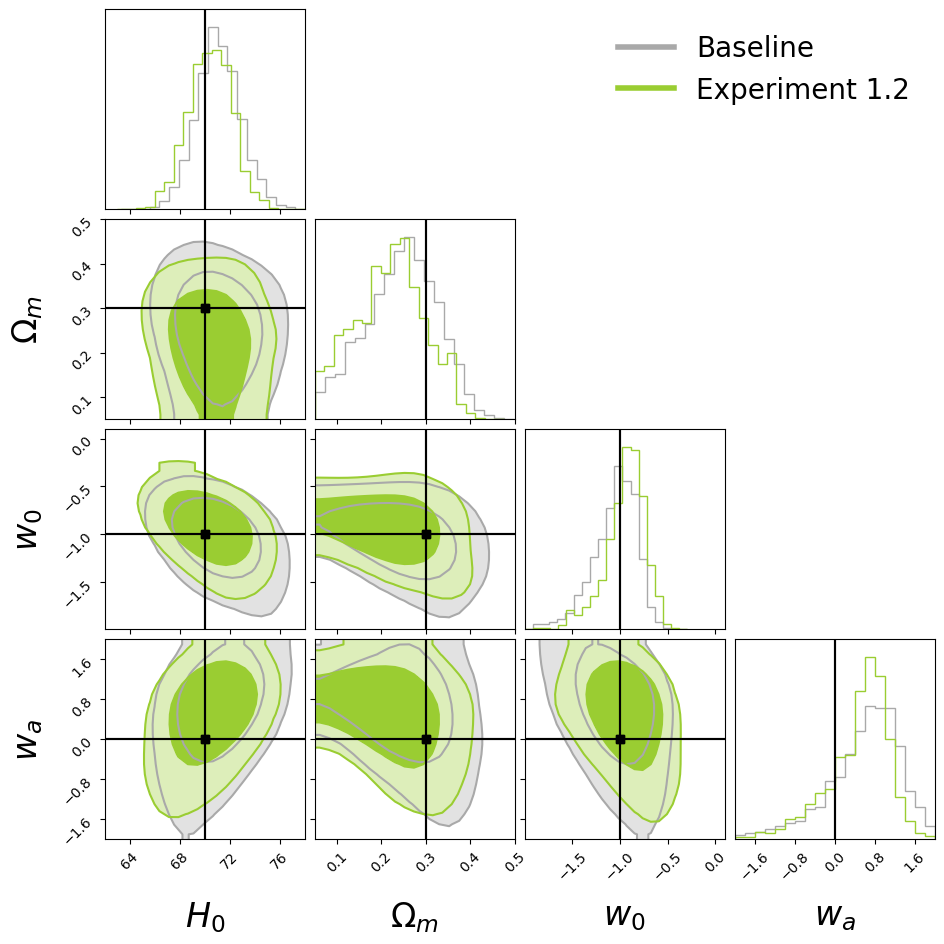

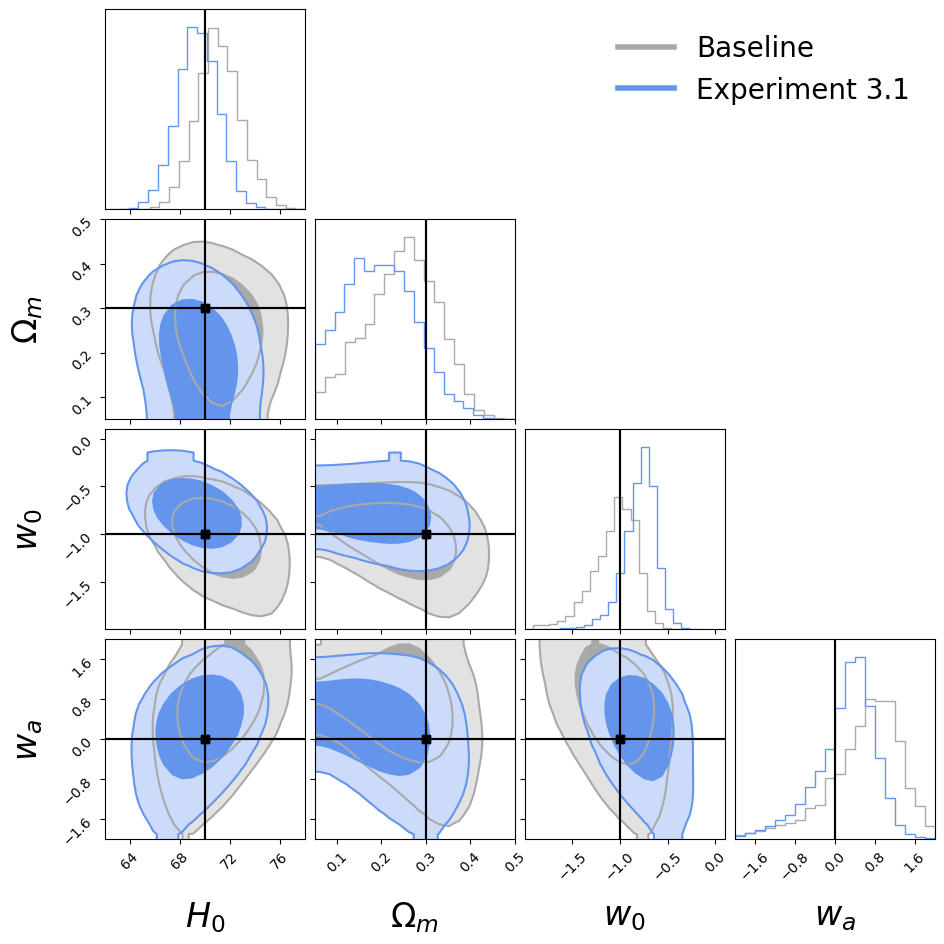

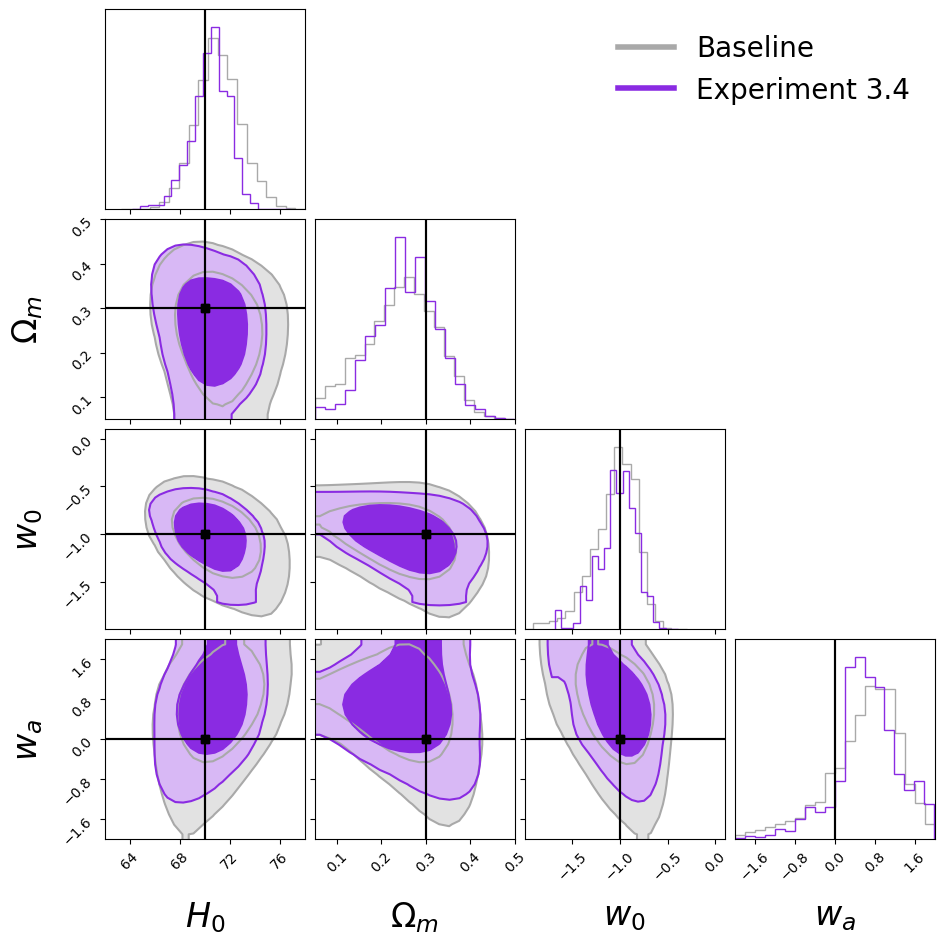

In [13]:
import matplotlib

metadata_gold = pd.read_csv('DataVectors/gold/truth_metadata.csv')

baseline_chain = np.transpose(chains_dict['exp0_2']['w0wa_seed6_LONG']['chain'][:70000], axes=(1,0,2))
baseline_label =  'Exp 0.2: Baseline, Seed 1'
exp_chains = [
    np.transpose(chains_dict['exp2_1']['w0wa_seed6_LONG']['chain'][:70000], axes=(1,0,2)),
    np.transpose(chains_dict['exp2_2']['w0wa_seed6_LONG']['chain'][:70000], axes=(1,0,2)),
    np.transpose(chains_dict['exp5_1']['w0wa_seed6_LONG']['chain'][:70000], axes=(1,0,2)),
    np.transpose(chains_dict['exp5_4']['w0wa_seed6_LONG']['chain'][:70000], axes=(1,0,2))
]
exp_names = [
    'Exp 1.1: Extra IFU Kin., Seed 5',
    'Exp 1.2: Extra Aperture Kin., Seed 5',
    'Exp 3.1: Extra Time-Delay Monitoring, Seed 5',
    'Exp 3.4: $\sigma(\Delta t)_{LSST}$ = 2 days, Seed 5'
]
num_chains = len(exp_chains)
burnin = [20000] * (num_chains+1)


exp_labels = [
    'Experiment 1.1', 'Experiment 1.2', 'Experiment 3.1', 'Experiment 3.4'
]

# Choose a color map for the contours
cmap = plt.get_cmap('cividis')
colors = ['darkgrey','seagreen','yellowgreen','cornflowerblue','blueviolet']
truth_colors = ["#000000"] * num_chains
custom_labels = []
custom_lines = []
custom_labels = []

for j,curr_chain in enumerate(exp_chains):
     
    print(exp_names[j]) 
    #median_and_uncertainty(curr_chain,burnin[j+1])
    zp,fom = DE_fom(curr_chain,burnin[i])

    figure = corner.corner(baseline_chain[:,burnin[0]:,[0,1,2,3]].reshape((-1,4)),plot_datapoints=False,
                color=colors[0],levels=[0.68,0.95],fill_contours=True,
                labels= ['$H_0$','$\Omega_m$','$w_0$','$w_a$'],
                dpi=300,truths=[70.,0.3,-1.0,0.],truth_color='black',
                fig=None,label_kwargs={'fontsize':22},smooth=2.)

    corner.corner(curr_chain[:,burnin[j+1]:,[0,1,2,3]].reshape((-1,4)),plot_datapoints=False,
            color=colors[j+1],levels=[0.68,0.95],fill_contours=True,
            labels=['$H_0$','$\Omega_m$','$w_0$','$w_a$'],
            dpi=300,truths=[70.,0.3,-1.0,0.],truth_color='black',
            fig=figure,label_kwargs={'fontsize':24},smooth=2.)

    custom_lines = [
        Line2D([0], [0], color=colors[0], lw=4),
        Line2D([0], [0], color=colors[j+1], lw=4)]

    custom_labels = [
        'Baseline',
        exp_labels[j]
    ]

    axes = np.array(figure.axes).reshape((4, 4))
    bounds = [[62.,78.],[0.05,0.5],[-2,0.1],[-2,2]]
    for r in range(0,4):
        for c in range(0,r+1):
            if bounds is not None:
                axes[r,c].set_xlim(bounds[c])
                if r != c :
                    axes[r,c].set_ylim(bounds[r])

    #plt.suptitle(exp_names[j],fontsize=16)

    #axes = np.array(figure.axes).reshape((num_params, num_params))
    axes[0,3].legend(custom_lines,custom_labels,frameon=False,fontsize=20)
    plt.savefig('/Users/smericks/Desktop/exp%d.pdf'%(j))

### Time-Delay Exps plot

Baseline
pivot redshift:  0.16573389673888253
DE FOM:  6.717735612262814
+70 $\sigma(\Delta t)$= 2 days
pivot redshift:  0.2170210590630853
DE FOM:  12.026376483776776
$\sigma(\Delta t)_{LSST}$= 4 days
pivot redshift:  0.17311137957620554
DE FOM:  7.22016793951367
$\sigma(\Delta t)_{LSST}$= 3 days
pivot redshift:  0.14105514025586524
DE FOM:  7.375849223170597
$\sigma(\Delta t)_{LSST}$= 2 days
pivot redshift:  0.23342335628667127
DE FOM:  9.921065564436981


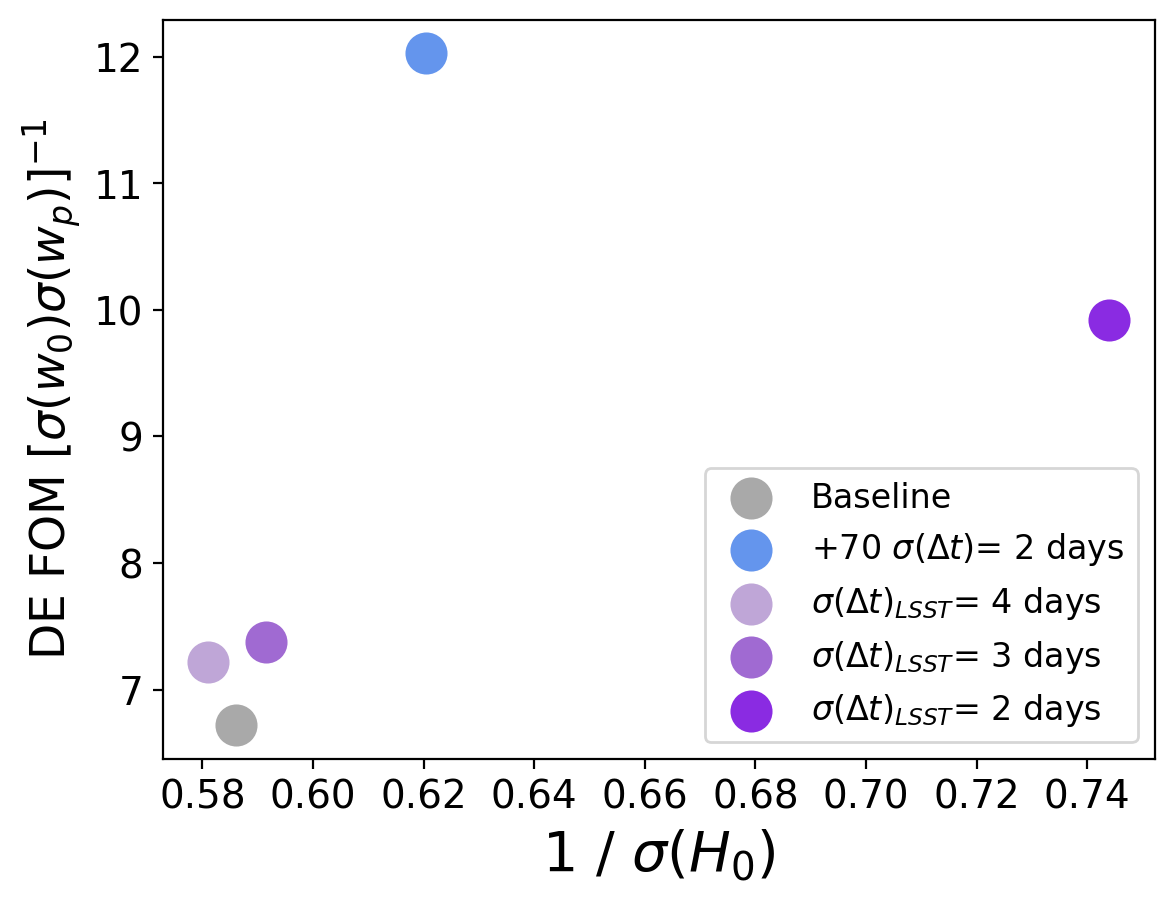

In [51]:
test_chain = np.transpose(chains_dict['exp0_2']['w0wa_seed6']['chain'],axes=(1,0,2))
burnin = 20000

chains = [
    np.transpose(chains_dict['exp0_2']['w0wa_seed6_LONG']['chain'][:70000],axes=(1,0,2)),
    np.transpose(chains_dict['exp5_1']['w0wa_seed6_LONG']['chain'][:70000],axes=(1,0,2)),
    np.transpose(chains_dict['exp5_2']['w0wa_seed6_LONG']['chain'][:70000],axes=(1,0,2)),
    np.transpose(chains_dict['exp5_3']['w0wa_seed6_LONG']['chain'][:70000],axes=(1,0,2)),
    np.transpose(chains_dict['exp5_4']['w0wa_seed6_LONG']['chain'][:70000],axes=(1,0,2))
]

labels = ['Baseline',
          '+70 $\sigma(\Delta t)$= 2 days',
          '$\sigma(\Delta t)_{LSST}$= 4 days',
           '$\sigma(\Delta t)_{LSST}$= 3 days',
            '$\sigma(\Delta t)_{LSST}$= 2 days']


colors = ['darkgrey','cornflowerblue',"#BFA6D7","#A06AD2",'#8A2BE2']
plt.figure(dpi=200)
for j,curr_chain in enumerate(chains):
    print(labels[j])
    test_chain = curr_chain[:,burnin:,:].reshape((-1,curr_chain.shape[2]))
    #sigma_h0 = np.std(test_chain[:,0],ddof=1)
    arviz_hdi = az.hdi(test_chain[:,0], hdi_prob=.68)
    sigma_h0 = (arviz_hdi[1] - arviz_hdi[0])/2
    zp,de_fom = DE_fom(curr_chain,burnin)

    plt.scatter(1 / sigma_h0 ,de_fom,label=labels[j],s=200,c=colors[j])
    #plt.scatter(100 * sigma_h0 / np.median(test_chain[:,0]),de_fom,label=labels[j],s=120,c=colors[j])

plt.legend(loc='lower right',fontsize=12)
plt.xlabel(r'1 / $\sigma(H_0)$',fontsize=20)
plt.ylabel('DE FOM [$\sigma(w_0) \sigma(w_p)$]$^{-1}$',fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('/Users/smericks/Desktop/time_delay_discussion.pdf',bbox_inches='tight')

### Power-Law Slope (for joint forecast) ###

Exp 0.2: Baseline
Exp 0.2: Baseline
pivot redshift:  0.16415856400946977
DE FOM:  6.685412687918315
Exp 0.2: Baseline + $\mu(\gamma_{lens})$
Exp 0.2: Baseline + $\mu(\gamma_{lens})$
pivot redshift:  0.1700343709328253
DE FOM:  5.2260316411696355


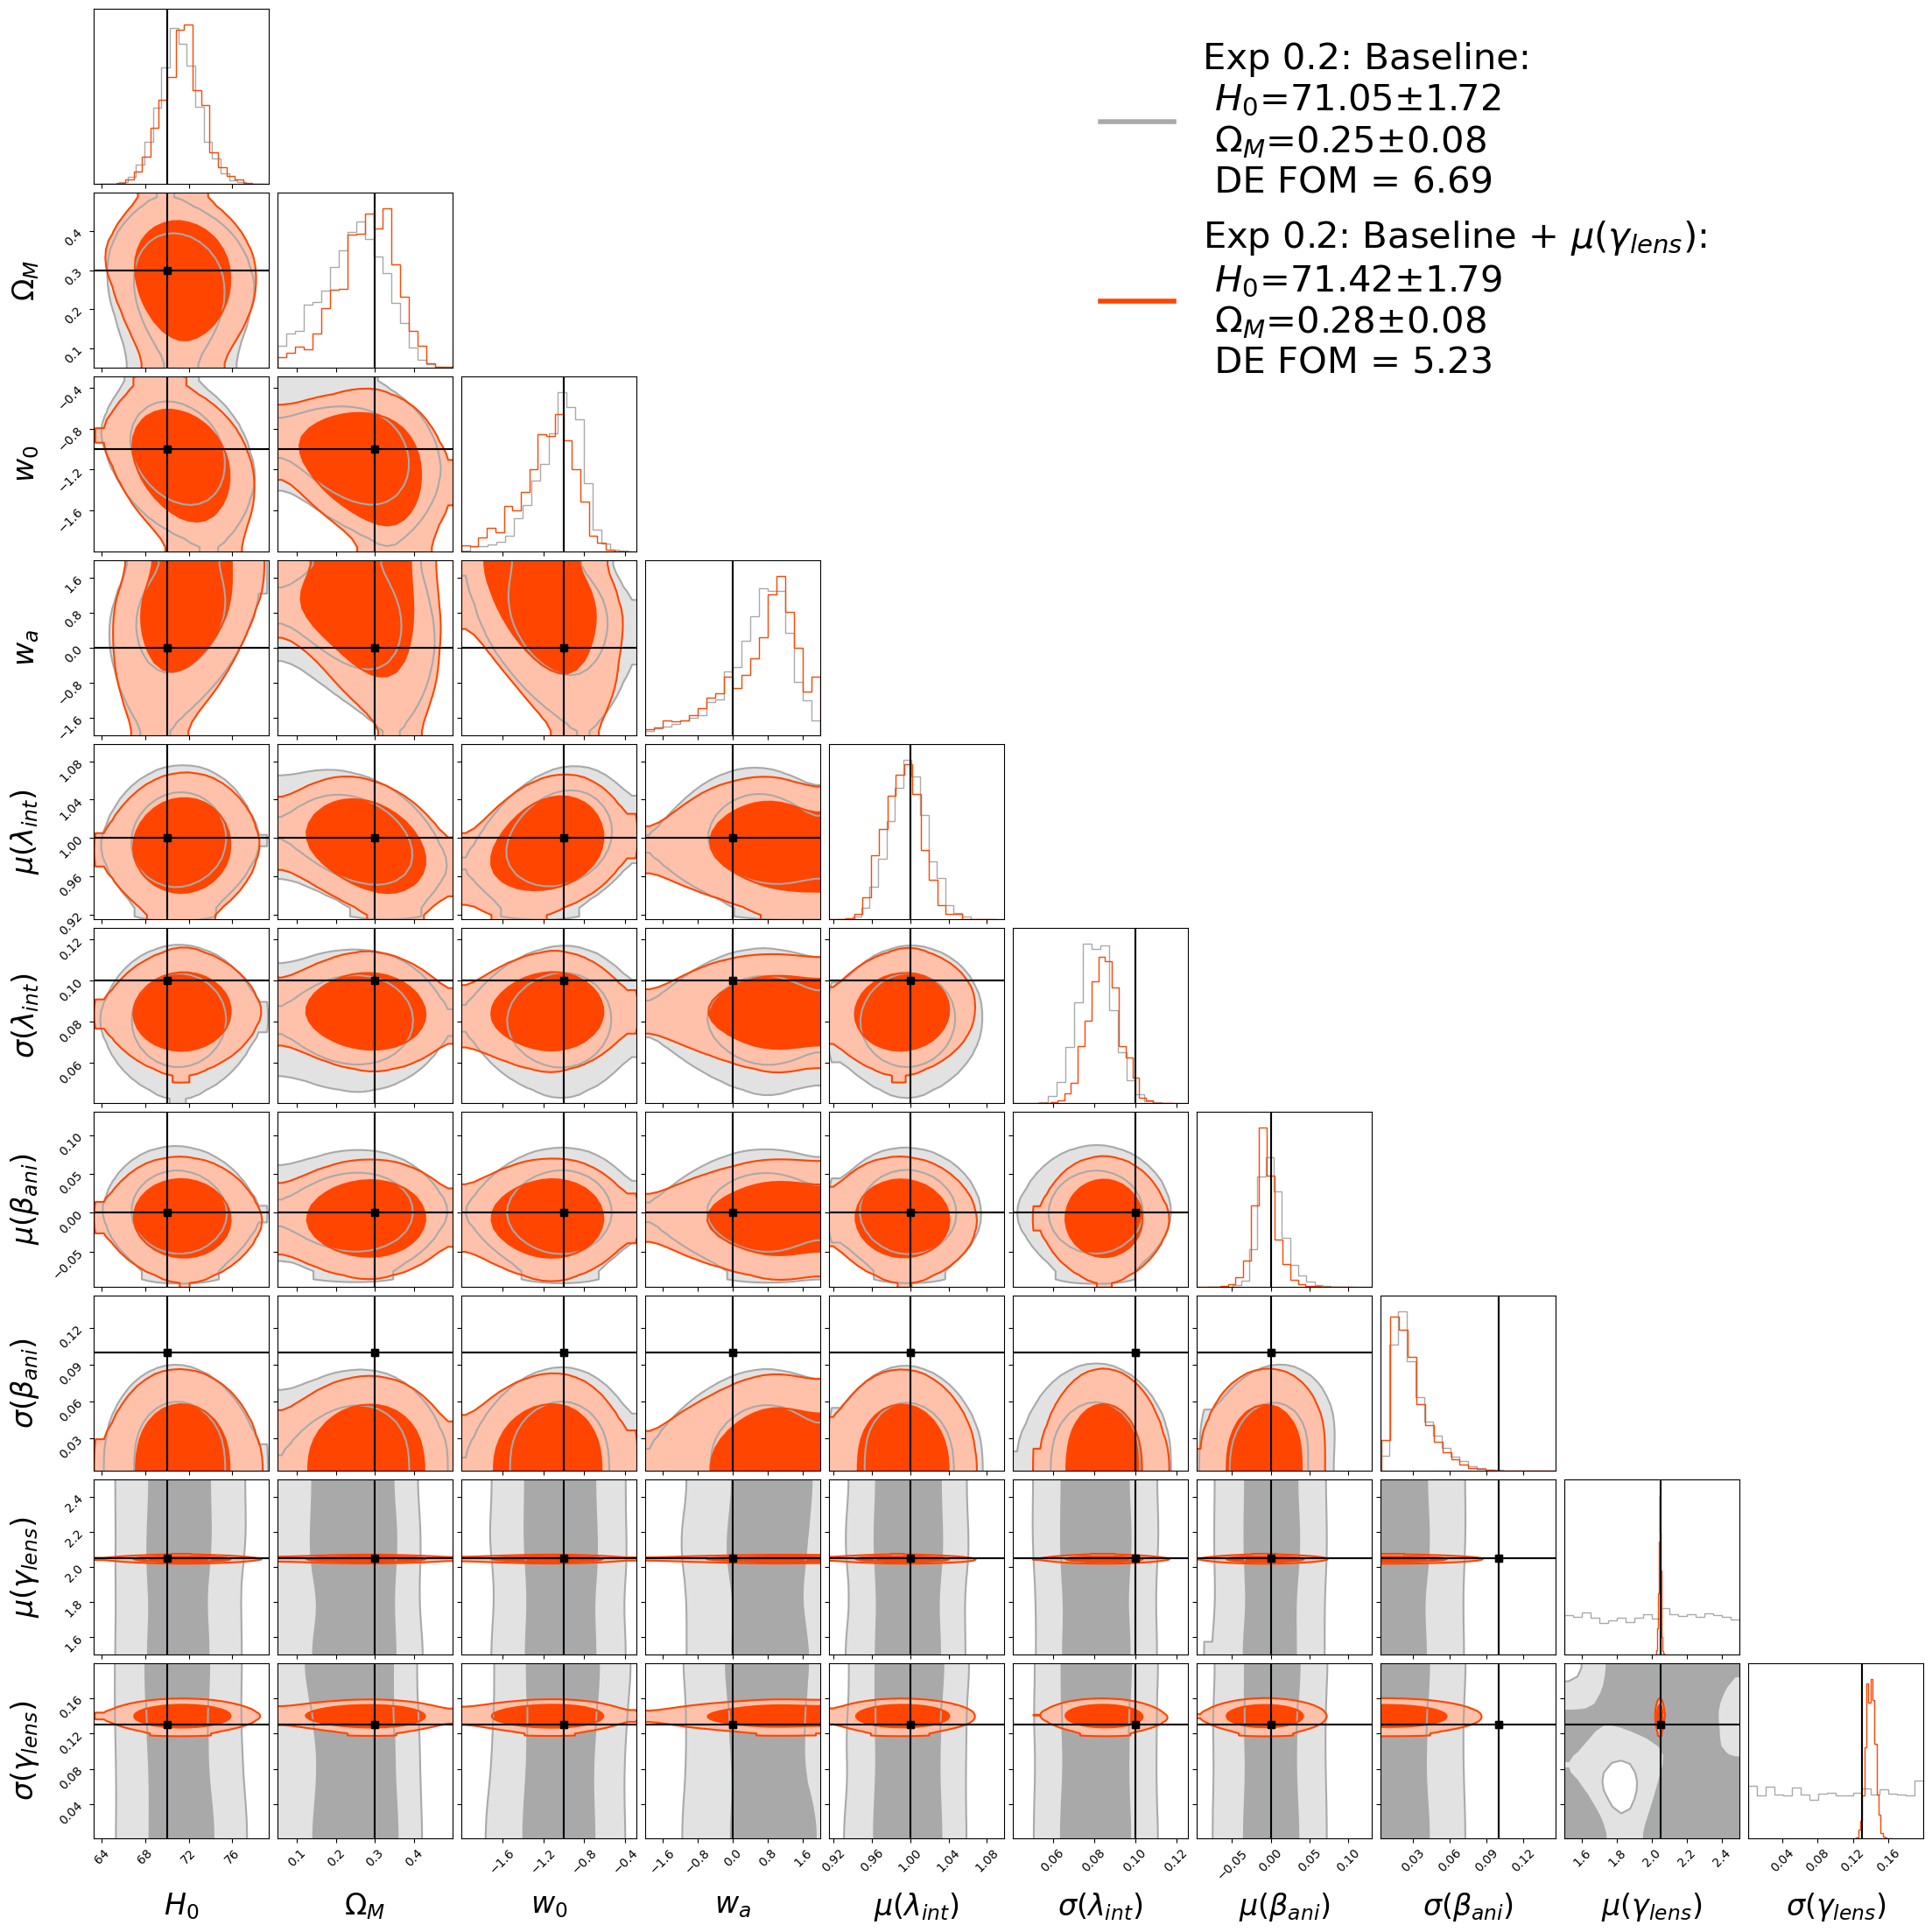

In [14]:
import matplotlib

exp_chains = [
    np.transpose(chains_dict['exp0_2']['w0wa_seed6_LONG']['chain'][:70000],axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed6_GAMMA']['chain'][:70000],axes=(1,0,2))]
exp_names = [
             'Exp 0.2: Baseline',
             'Exp 0.2: Baseline + $\mu(\gamma_{lens})$']

num_chains = len(exp_chains)
burnin = [20000]*num_chains
cmap = plt.get_cmap('ocean')
colors = ['darkgrey','orangered','deepskyblue']
truth_colors = ["#000000"] * num_chains

custom_lines = []
custom_labels = []

for i,exp_chain in enumerate(exp_chains):

    num_params = exp_chain.shape[2]

    my_color = colors[i]
    
    print(exp_names[i])
    #median_and_uncertainty(exp_chain,burnin[i])
    print(exp_names[i])
    zp,fom = DE_fom(exp_chain,burnin[i])
     
    if i ==0:

        np.save('lensed_AGN_samps.npy',
            exp_chain[:,burnin[i]:].reshape((-1,exp_chain.shape[2])) )

        figure = corner.corner(exp_chain[:,burnin[i]:].reshape((-1,exp_chain.shape[2])),plot_datapoints=False,
            color=my_color,levels=[0.68,0.95],fill_contours=True,
            labels= ['$H_0$','$\Omega_M$','$w_0$','$w_a$',
                r'$\mu(\lambda_{int})$',r'$\sigma(\lambda_{int})$',
                r'$\mu(\beta_{ani})$',r'$\sigma(\beta_{ani})$',
                r'$\mu(\gamma_{lens})$',r'$\sigma(\gamma_{lens})$'],
            dpi=300,truths=[70.,0.3,-1.0,0.,1.,0.1,0.,0.1,2.05,0.13],
            #0.,0.1,2.05,0.13],truth_color=truth_colors[i],
            fig=None,label_kwargs={'fontsize':24},smooth=3)

    else:

        corner.corner(exp_chain[:,burnin[i]:].reshape((-1,exp_chain.shape[2])),plot_datapoints=False,
            color=my_color,levels=[0.68,0.95],fill_contours=True,
            labels=['$H_0$','$\Omega_M$','$w_0$','$w_a$',
                r'$\mu(\lambda_{int})$',r'$\sigma(\lambda_{int})$',
                r'$\mu(\beta_{ani})$',r'$\sigma(\beta_{ani})$',
                r'$\mu(\gamma_{lens})$',r'$\sigma(\gamma_{lens})$'],
            dpi=300,truths=[70.,0.3,-1.0,0.,1.,0.1,0.,0.1,2.05,0.13],truth_color=truth_colors[i],
            fig=figure,label_kwargs={'fontsize':24},smooth=3)
        
    custom_lines.append(Line2D([0], [0], color=my_color, lw=4))

    # calculate h0 constraint
    h0, h0_sigma = median_sigma_from_samples(exp_chain[:,burnin[i]:,0].reshape((-1,1)),weights=None)
    OmegaM, OmegaM_sigma = median_sigma_from_samples(exp_chain[:,burnin[i]:,1].reshape((-1,1)),weights=None)
    w0, w0_sigma = median_sigma_from_samples(exp_chain[:,burnin[i]:,2].reshape((-1,1)),weights=None)
    wa, wa_sigma = median_sigma_from_samples(exp_chain[:,burnin[i]:,3].reshape((-1,1)),weights=None)
    # construct label
    custom_labels.append(exp_names[i]+
        ':\n $H_0$=%.2f$\pm$%.2f \n $\Omega_M$=%.2f$\pm$%.2f \n DE FOM = %.2f'%(
        h0, h0_sigma, OmegaM, OmegaM_sigma, fom))

"""
axes = np.array(figure.axes).reshape((3, 3))
bounds = [[63,77],[1.91,2.095],[0.0,0.2]]
for r in range(0,3):
        for c in range(0,r+1):
            if bounds is not None:
                axes[r,c].set_xlim(bounds[c])
                if r != c :
                    axes[r,c].set_ylim(bounds[r])

axes = np.array(figure.axes).reshape((3, 3))
"""

axes = np.array(figure.axes).reshape((10, 10))
axes[0,8].legend(custom_lines,custom_labels,frameon=False,fontsize=30)
plt.savefig('/Users/smericks/Desktop/lens_selection_comp.pdf')

### Check chain convergence... ###

Text(0.5, 1.0, '$\\Omega_M$')

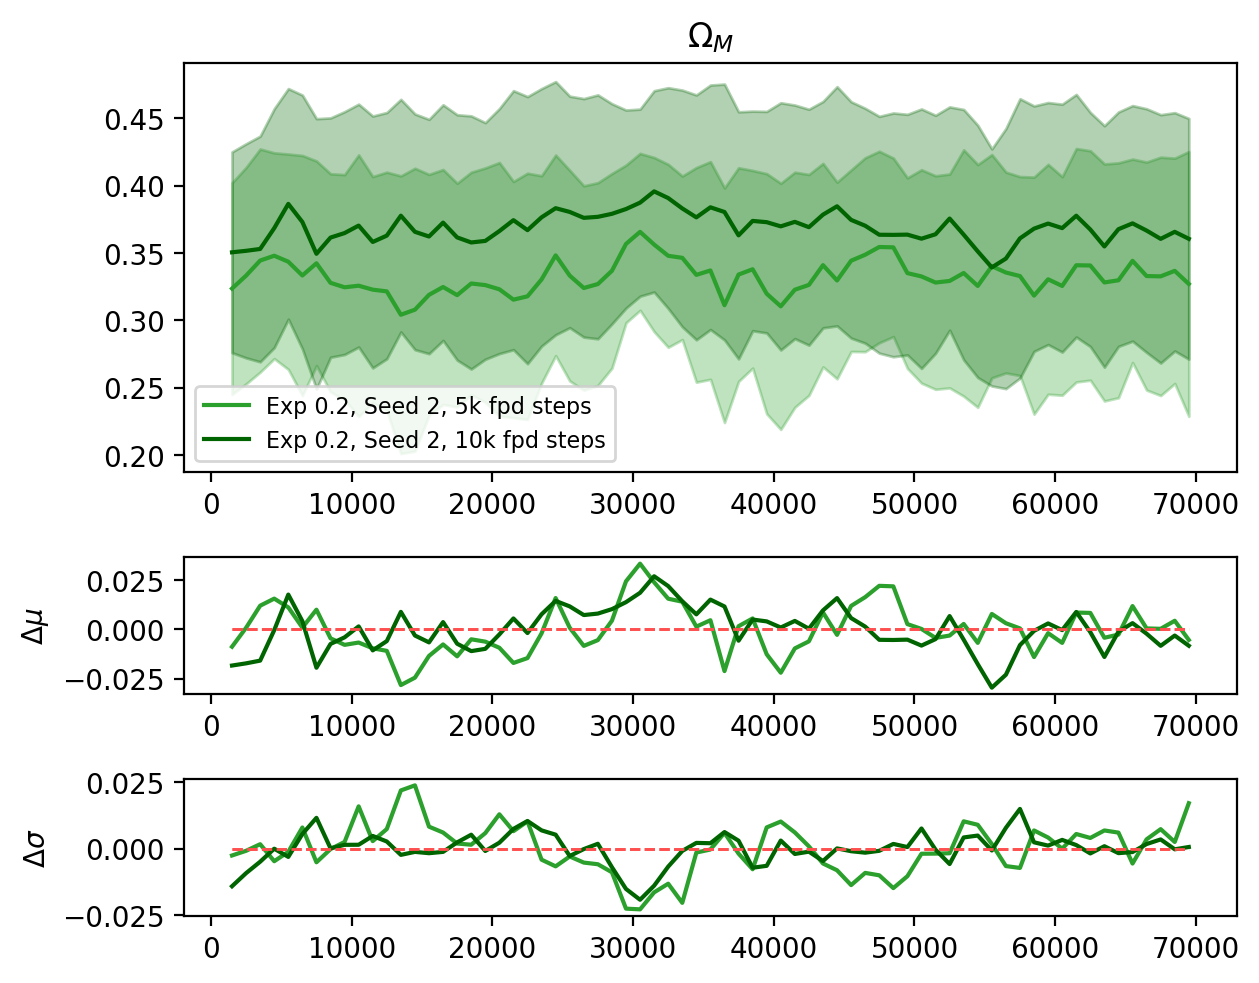

In [325]:
# let's do chunks of 500 after burnin=2000
def plot_posterior_median(emcee_chain,burnin,param_idx,color='black',figure=None,label=''):
    """
    Args:
        emcee_chain (shape (n_steps,n_walkers,n_params))
    """
    chunk_size = 1000
    min_idx = burnin
    max_idx = burnin+chunk_size

    if figure is None:
        figure = plt.figure(dpi=200)
        gs = figure.add_gridspec(3, 1, height_ratios=[3, 1, 1])
        ax_main = figure.add_subplot(gs[0])
        figure.add_subplot(gs[1], sharex=ax_main)
        figure.add_subplot(gs[2], sharex=ax_main)

    mean_vals = []
    std_dev_vals = []
    x_vals = []

    while max_idx < np.shape(emcee_chain)[0]:
        chunk_of_samps = emcee_chain[min_idx:max_idx,:,param_idx]
        mean = np.mean(chunk_of_samps)
        std_dev = np.std(chunk_of_samps,ddof=1)
        
        # Track and plot mean and std_dev in bottom panels
        mean_vals.append(mean)
        std_dev_vals.append(std_dev)
        x_vals.append(max_idx)

        min_idx += chunk_size
        max_idx += chunk_size

    # Add bottom panels for mean and std_dev
    axs = [figure.axes[0], figure.axes[1], figure.axes[2]]
    mean_vals = np.array(mean_vals)
    std_dev_vals = np.array(std_dev_vals)
    x_vals_arr = np.array(x_vals)
    axs[0].plot(x_vals_arr, mean_vals, color=color,label=label)
    axs[0].fill_between(x_vals_arr, mean_vals - std_dev_vals, mean_vals + std_dev_vals, color=color, alpha=0.3)
    last_5 = np.mean(mean_vals)
    axs[1].plot(x_vals,(mean_vals - last_5),color=color)
    axs[1].hlines(y=0., xmin=x_vals_arr[0], xmax=x_vals_arr[-1], color="#FF5050", linestyles='--', linewidth=1)
    axs[1].set_ylabel('$\Delta \mu$')
    last_5 = np.mean(std_dev_vals)
    axs[2].plot(x_vals,std_dev_vals - last_5,color=color)
    axs[2].hlines(y=0., xmin=x_vals_arr[0], xmax=x_vals_arr[-1], color="#FF5050", linestyles='--', linewidth=1)
    axs[2].set_ylabel('$\Delta \sigma$')
    plt.tight_layout()

    return figure

#colors = ['darkgrey','seagreen','yellowgreen', 'cornflowerblue','blueviolet']
figure2 = plot_posterior_median(chains_dict['exp0_2']['w0wa_seed3_TdcosmoPrior']['chain'],500,param_idx=1,
    color='C2',label=r'Exp 0.2, Seed 2, 5k fpd steps')
figure2 = plot_posterior_median(chains_dict['exp0_2']['w0wa_seed3_10k_fpd']['chain'],500,param_idx=1,
    color='darkgreen',label=r'Exp 0.2, Seed 2, 10k fpd steps',figure=figure2)
#figure2.axes[0].hlines(y=70.,xmin=1500,xmax=50000,color='black',label='Truth')
figure2.axes[0].legend(fontsize=8,loc='lower left')
figure2.axes[0].set_title(r'$\Omega_M$')

# 'seagreen','yellowgreen'

### Figure 6a ###
Let's evaluate stochasticity across seeds

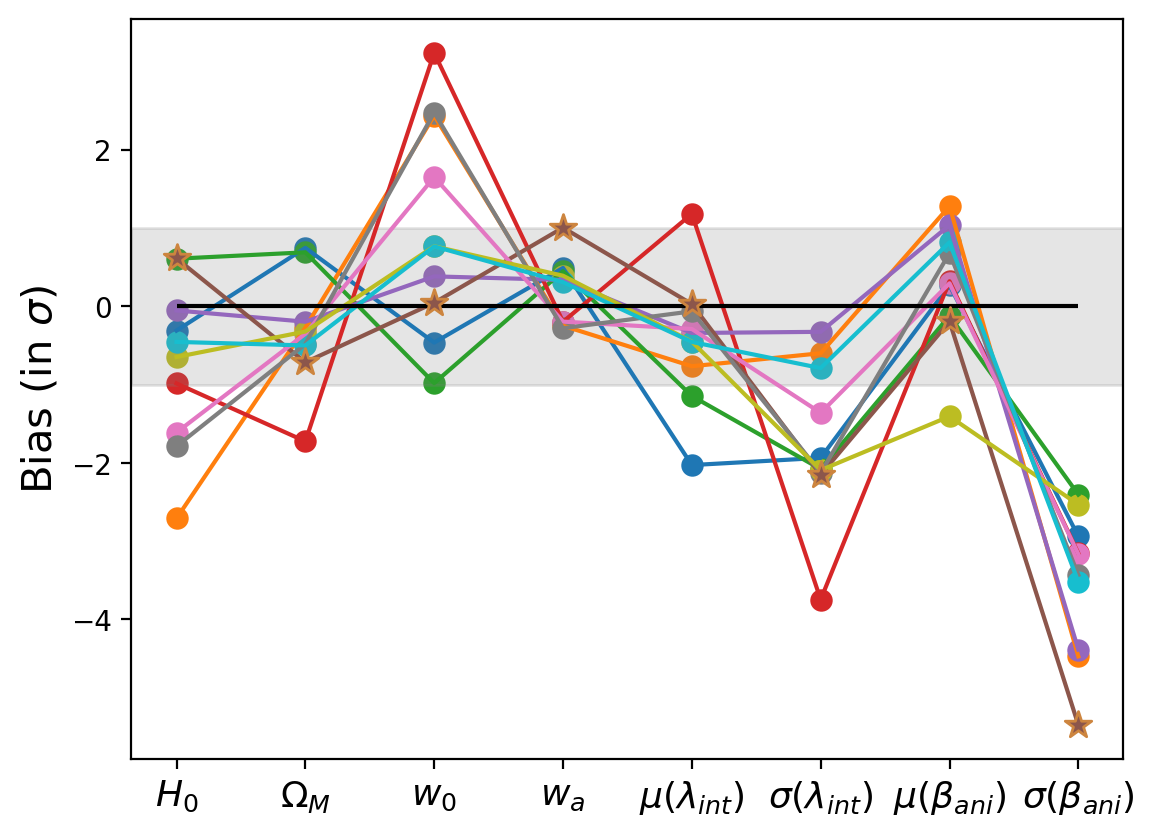

In [18]:
ten_seeds = [
    np.transpose(chains_dict['exp0_2']['w0wa_seed1']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed2']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed3']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed4']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed5']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed6']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed7']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed8']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed9']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed10']['chain'], axes=(1,0,2))
]
plt.figure(dpi=200)
burnin = 30000
truth_vals = [70.,0.3,-1.,0.,1.,0.1,0.,0.1]
for i,chain in enumerate(ten_seeds):

    samps = chain[:,burnin:,:].reshape((-1,exp_chain.shape[2]))
    samps = samps[:,:8]
    med = np.median(samps,axis=0)
    low = np.quantile(samps,q=0.1586,axis=0)
    high = np.quantile(samps,q=0.8413,axis=0)

    error = med - truth_vals
    sigma = ((high-med)+(med-low))/2
    bias = error/sigma

    plt.plot([0,1,2,3,4,5,6,7], bias,label='Seed %d'%(i))
    if i == 5:
        plt.scatter([0,1,2,3,4,5,6,7], bias, s=100, marker='*',edgecolors='peru',zorder=200)
    else:
        plt.scatter([0,1,2,3,4,5,6,7], bias, s=50)

plt.hlines(y=0.,xmin=0.,xmax=7.,color='black')
plt.ylabel('Bias (in $\sigma$)',fontsize=15)
plt.xticks(ticks=[0,1,2,3,4,5,6,7],labels=['$H_0$','$\Omega_M$','$w_0$','$w_a$',
    r'$\mu(\lambda_{int})$',r'$\sigma(\lambda_{int})$',
    r'$\mu(\beta_{ani})$',r'$\sigma(\beta_{ani})$'],fontsize=13)

plt.axhspan(-1, 1, color='grey', alpha=0.2)
#plt.legend(loc='lower left',fontsize=6)
#plt.title('Experiment 0.2, Ten Random Seeds')
plt.savefig('/Users/smericks/Desktop/baseline_fluctuation_bias.pdf')

### Figure 6b ###

(50, 70000, 10)
seed 0
sigma h0:  1.8506678026448284
percent h0:  2.6550929574868056
sigma omegaM:  0.0174073803340295
pivot redshift:  0.31906381951685037
DE FOM:  9.070646158917686
(50, 70000, 10)
seed 1
sigma h0:  1.5317697591636517
percent h0:  2.3462959790779814
sigma omegaM:  0.0165645638339926
pivot redshift:  0.3559831768986043
DE FOM:  15.573959735566417
(50, 70000, 10)
seed 2
sigma h0:  2.0161311594152522
percent h0:  2.806350648635465
sigma omegaM:  0.017518356759069043
pivot redshift:  0.2893207330184945
DE FOM:  7.026470244018417
(50, 70000, 10)
seed 3
sigma h0:  1.4236200124774072
percent h0:  2.132918241710626
sigma omegaM:  0.017076785880741796
pivot redshift:  0.3180449906709491
DE FOM:  17.86162443371455
(50, 70000, 10)
seed 4
sigma h0:  1.7146858416772943
percent h0:  2.4493620604452633
sigma omegaM:  0.01689342801382676
pivot redshift:  0.2973686218816678
DE FOM:  8.62314133498705
(50, 70000, 10)
seed 5
sigma h0:  1.7818080945470527
percent h0:  2.515102146596031
si

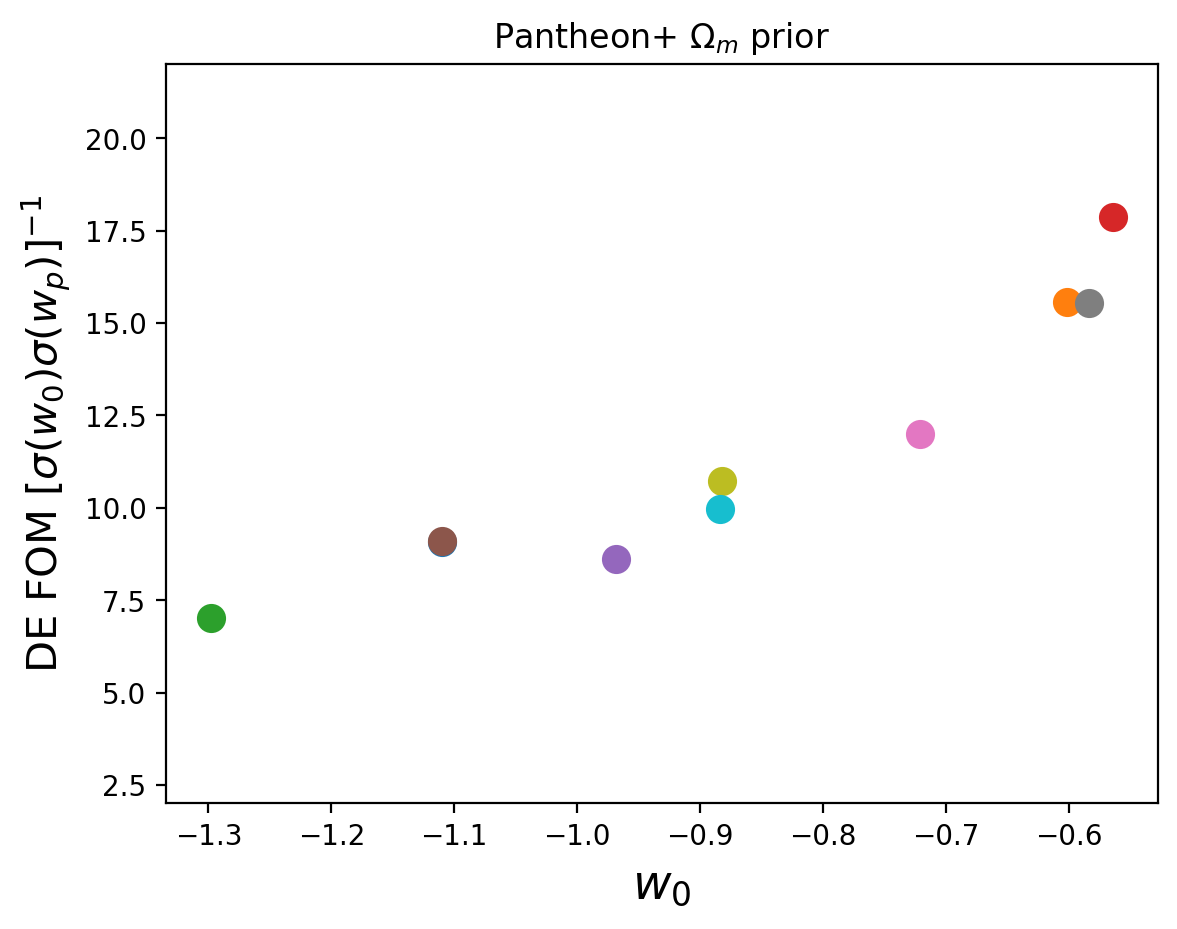

In [19]:
burnin=20000
chains = [
    np.transpose(chains_dict['exp0_2']['w0wa_seed1_pantheonOM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed2_pantheonOM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed3_pantheonOM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed4_pantheonOM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed5_pantheonOM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed6_pantheonOM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed7_pantheonOM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed8_pantheonOM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed9_pantheonOM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed10_pantheonOM']['chain'], axes=(1,0,2))
]
"""
chains = [
    np.transpose(chains_dict['exp1_3']['w0wa_seed1_OmegaM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp1_3']['w0wa_seed2_OmegaM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp1_3']['w0wa_seed3_OmegaM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp1_3']['w0wa_seed4_OmegaM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp1_3']['w0wa_seed5_OmegaM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp1_3']['w0wa_seed6_OmegaM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp1_3']['w0wa_seed7_OmegaM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp1_3']['w0wa_seed8_OmegaM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp1_3']['w0wa_seed9_OmegaM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp1_3']['w0wa_seed10_OmegaM']['chain'], axes=(1,0,2))
]
"""
de_fom_list = []
plt.figure(dpi=200)
for j,curr_chain in enumerate(chains):
    print(curr_chain.shape)
    test_chain = curr_chain[:,burnin:,:].reshape((-1,curr_chain.shape[2]))
    #sigma_h0 = np.std(test_chain[:,0],ddof=1)
    arviz_hdi = az.hdi(test_chain[:,0], hdi_prob=.68)
    sigma_h0 = (arviz_hdi[1] - arviz_hdi[0])/2
    arviz_hdi = az.hdi(test_chain[:,1], hdi_prob=.68)
    sigma_omegaM = (arviz_hdi[1] - arviz_hdi[0])/2
    # check median w0
    median_w0 = np.median(test_chain[:,2])
    print('seed %d'%(j))
    print('sigma h0: ', sigma_h0)
    print('percent h0: ', 100*sigma_h0/np.median(test_chain[:,0]))
    print('sigma omegaM: ', sigma_omegaM)
    zp,de_fom = DE_fom(curr_chain,burnin)
    de_fom_list.append(de_fom)
    #if j == 5:
    #    plt.scatter(sigma_h0,de_fom,label='Init seed %d'%(j),s=180,marker='*',edgecolors='peru')
    #else:
    plt.scatter(median_w0,de_fom,label='Init seed %d'%(j),s=90)

plt.ylabel('DE FOM [$\sigma(w_0) \sigma(w_p)$]$^{-1}$',fontsize=15)
plt.xlabel('$w_0$',fontsize=17)
#plt.legend(fontsize=12)
#plt.xlim([1.4,2.1])
plt.ylim([2.,22.])
plt.title('Pantheon+ $\Omega_m$ prior')
plt.savefig('/Users/smericks/Desktop/baseline_fluctuation_precision.pdf')

(0.0, 5400.0)

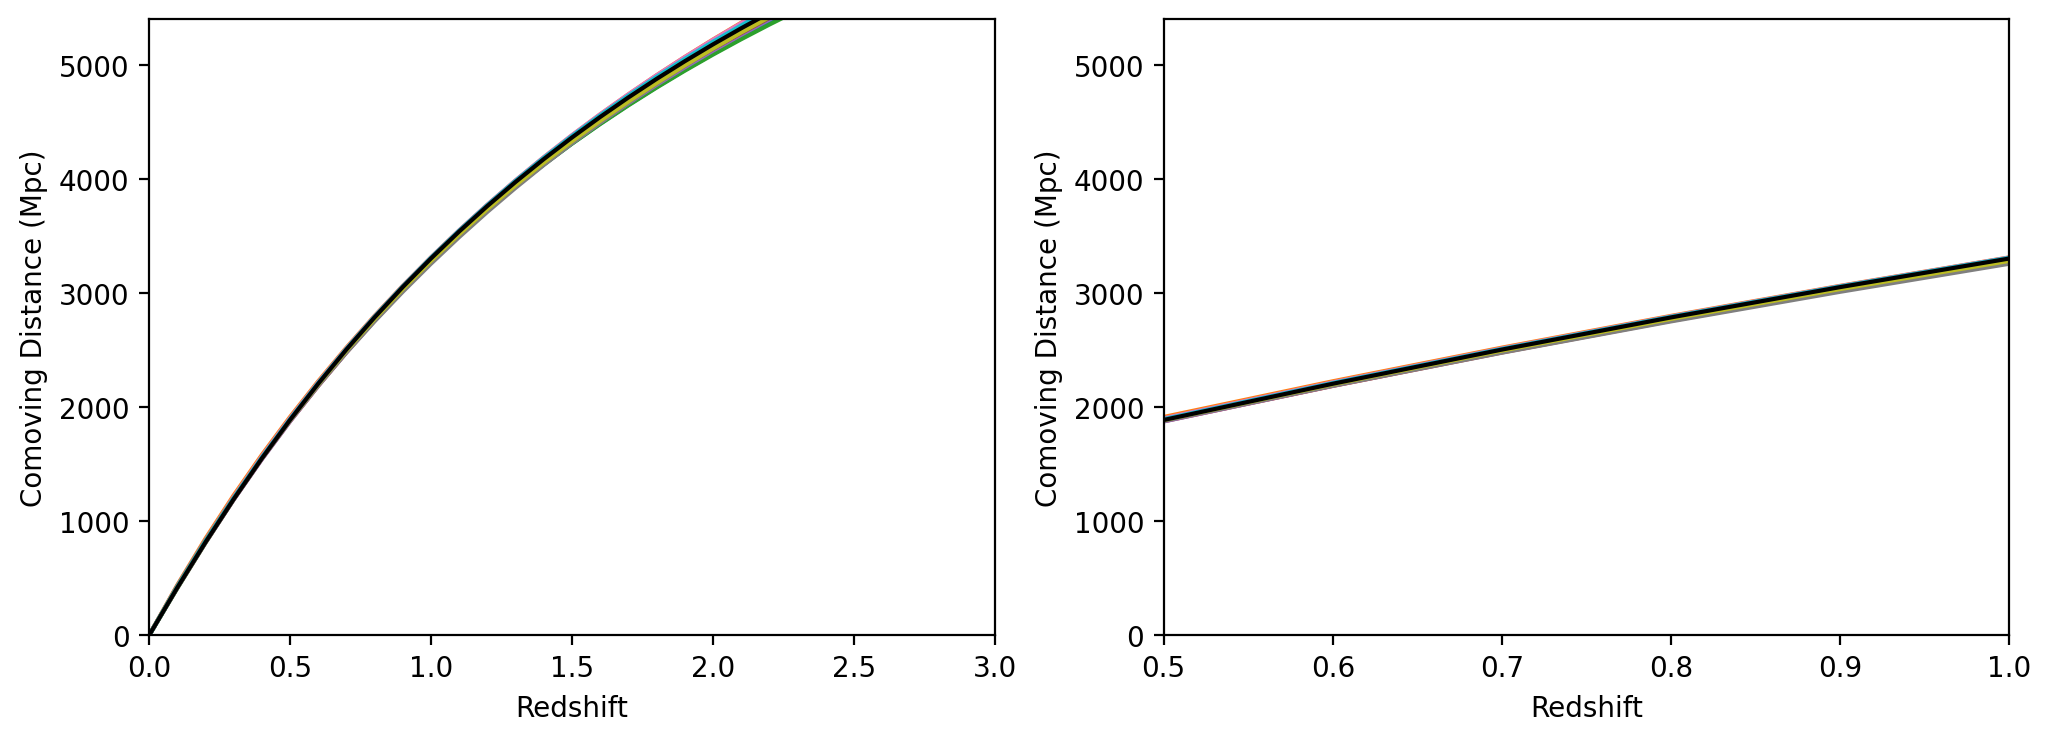

In [25]:
from astropy.cosmology import w0waCDM

burnin=20000
chains = [
    np.transpose(chains_dict['exp0_2']['w0wa_seed1_pantheonOM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed2_pantheonOM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed3_pantheonOM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed4_pantheonOM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed5_pantheonOM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed6_pantheonOM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed7_pantheonOM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed8_pantheonOM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed9_pantheonOM']['chain'], axes=(1,0,2)),
    np.transpose(chains_dict['exp0_2']['w0wa_seed10_pantheonOM']['chain'], axes=(1,0,2))
]

z_range = np.arange(1100,-1.,-0.1)

scale_factors = []
ages = []
present_ages = []
comoving_distances = []

for curr_chain in chains:
    test_chain = curr_chain[:,burnin:,:].reshape((-1,curr_chain.shape[2]))
    
    h0_input = np.median(test_chain[:,0])
    omega_m_input = np.median(test_chain[:,1])
    omega_de_input = 1. - omega_m_input
    w0_input = np.median(test_chain[:,2])
    wa_input = np.median(test_chain[:,3])

    w0wa_cosmo = w0waCDM(H0=h0_input,
                    Om0=omega_m_input,Ode0=omega_de_input,
                    w0=w0_input,wa=wa_input)

    scale_factors.append(w0wa_cosmo.scale_factor(z_range))
    ages.append(w0wa_cosmo.age(z_range))
    present_ages.append(w0wa_cosmo.age(0.))
    comoving_distances.append(w0wa_cosmo.comoving_distance(z_range))

# append the ground truth!
w0wa_cosmo = w0waCDM(H0=70.,
                Om0=0.3,Ode0=(1-0.3),
                w0=-1.,wa=0.)

scale_factors.append(w0wa_cosmo.scale_factor(z_range))
ages.append(w0wa_cosmo.age(z_range))
present_ages.append(w0wa_cosmo.age(0.))
comoving_distances.append(w0wa_cosmo.comoving_distance(z_range))


#labels = ['']
colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','black']

fig,axs = plt.subplots(1,2,dpi=200,figsize=(12,4))
for i in range(0,len(ages)):
    axs[0].plot(z_range,comoving_distances[i],color=colors[i])
    #axs[0].vlines(x=present_ages[i].value, ymin=0, ymax=1.25, color=colors[i], linestyle='--',alpha=0.5)
    axs[1].plot(z_range,comoving_distances[i],color=colors[i])
    
axs[0].set_xlabel('Redshift')
axs[0].set_ylabel('Comoving Distance (Mpc)')
axs[0].set_xlim([0,3.])
axs[0].set_ylim([0,5400])
axs[1].set_xlabel('Redshift')
axs[1].set_ylabel('Comoving Distance (Mpc)')
axs[1].set_xlim([0.5,1.])
axs[1].set_ylim([0,5400])

(-7.5, 7.5)

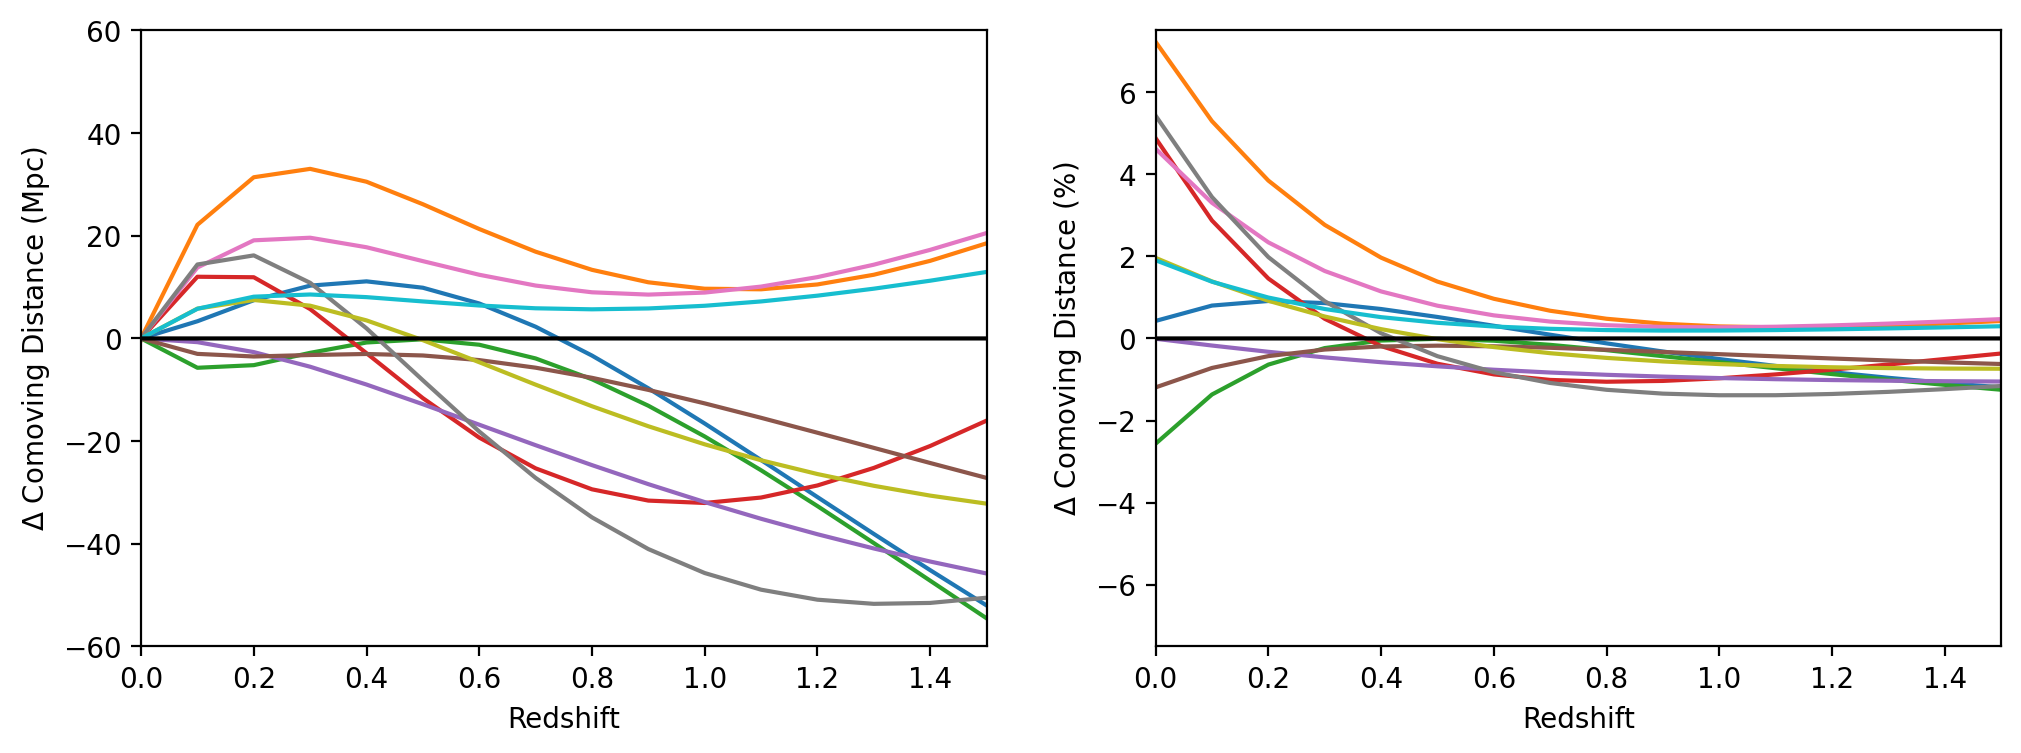

In [31]:
#labels = ['']
colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','black']

fig,axs = plt.subplots(1,2,dpi=200,figsize=(12,4))
for i in range(0,len(ages)):
    axs[0].plot(z_range,comoving_distances[i]-comoving_distances[-1],color=colors[i])
    #axs[0].vlines(x=present_ages[i].value, ymin=0, ymax=1.25, color=colors[i], linestyle='--',alpha=0.5)
    axs[1].plot(z_range,100*(comoving_distances[i]-comoving_distances[-1])/comoving_distances[-1],color=colors[i])
    
axs[0].set_xlabel('Redshift')
axs[0].set_ylabel('$\Delta$ Comoving Distance (Mpc)')
axs[0].set_xlim([0.,1.5])
axs[0].set_ylim([-60,60])
axs[1].set_xlabel('Redshift')
axs[1].set_ylabel('$\Delta$ Comoving Distance (%)')
axs[1].set_xlim([0,1.5])
axs[1].set_ylim([-7.5,7.5])

### Calculating fpd precision for every lens in HST-FM, HST-NPE ###

JWST-FM   0.0199594936333169
HST-FM   0.04334015290380251
HST-NPE   0.11319103730516214
LSST-NPE   0.1854920646175998


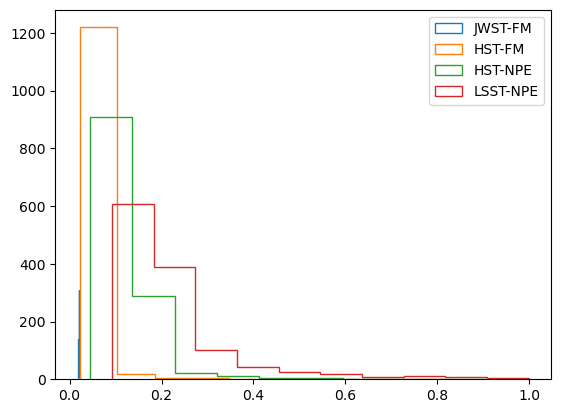

In [21]:
truth_df = pd.read_csv('DataVectors/gold/truth_metadata.csv')

# JWST-FM, HST-FM, HST-NPE, LSST-NPE
dbl_dv_files = ['DataVectors/gold/dbl_posteriors_JWST_DEBIASED.h5',
                'DataVectors/gold/dbl_posteriors_TDCOSMO25_DEBIASED.h5',
                'DataVectors/gold/dbl_posteriors_DEBIASED.h5',
                'DataVectors/silver/dbl_posteriors_DEBIASED.h5']
quad_dv_files = ['DataVectors/gold/quad_posteriors_JWST_DEBIASED.h5',
                'DataVectors/gold/quad_posteriors_TDCOSMO25_DEBIASED.h5',
                'DataVectors/gold/quad_posteriors_DEBIASED.h5',
                'DataVectors/silver/quad_posteriors_DEBIASED.h5']

model_type = ['JWST-FM','HST-FM','HST-NPE','LSST-NPE']

plt.figure()

for j,mt in enumerate(model_type):

    fpd_perc_prec = []

    # dbls
    with h5py.File(dbl_dv_files[j],'r') as h5:
        fpd_samps = h5['fpd_samps'][:]
        lens_param_samps = h5['lens_param_samps'][:]
        catalog_idxs = h5['catalog_idxs'][:]
        for i,cidx in enumerate(catalog_idxs):
            truth_row = truth_df[np.isin(truth_df['catalog_idx'],cidx)]
            fpd_perc_prec.append( np.std(fpd_samps[i,:,0]) / np.abs(truth_row['fpd01'].item()) )

    # quads
    with h5py.File(quad_dv_files[j],'r') as h5:
        fpd_samps = h5['fpd_samps'][:]
        lens_param_samps = h5['lens_param_samps'][:]
        catalog_idxs = h5['catalog_idxs'][:]
        for i,cidx in enumerate(catalog_idxs):
            truth_row = truth_df[np.isin(truth_df['catalog_idx'],cidx)]
            fpd_perc_prec.append( np.std(fpd_samps[i,:,0]) / np.abs(truth_row['fpd01'].item()) )

    fpd_perc_prec = np.asarray(fpd_perc_prec)
    print(mt,' ',np.median(fpd_perc_prec))
    plt.hist(fpd_perc_prec[fpd_perc_prec < 1.],histtype='step',label=mt)

plt.legend()

32 lenses avail
<KeysViewHDF5 ['catalog_idx', 'cov_npe', 'images_array', 'mu_npe']>


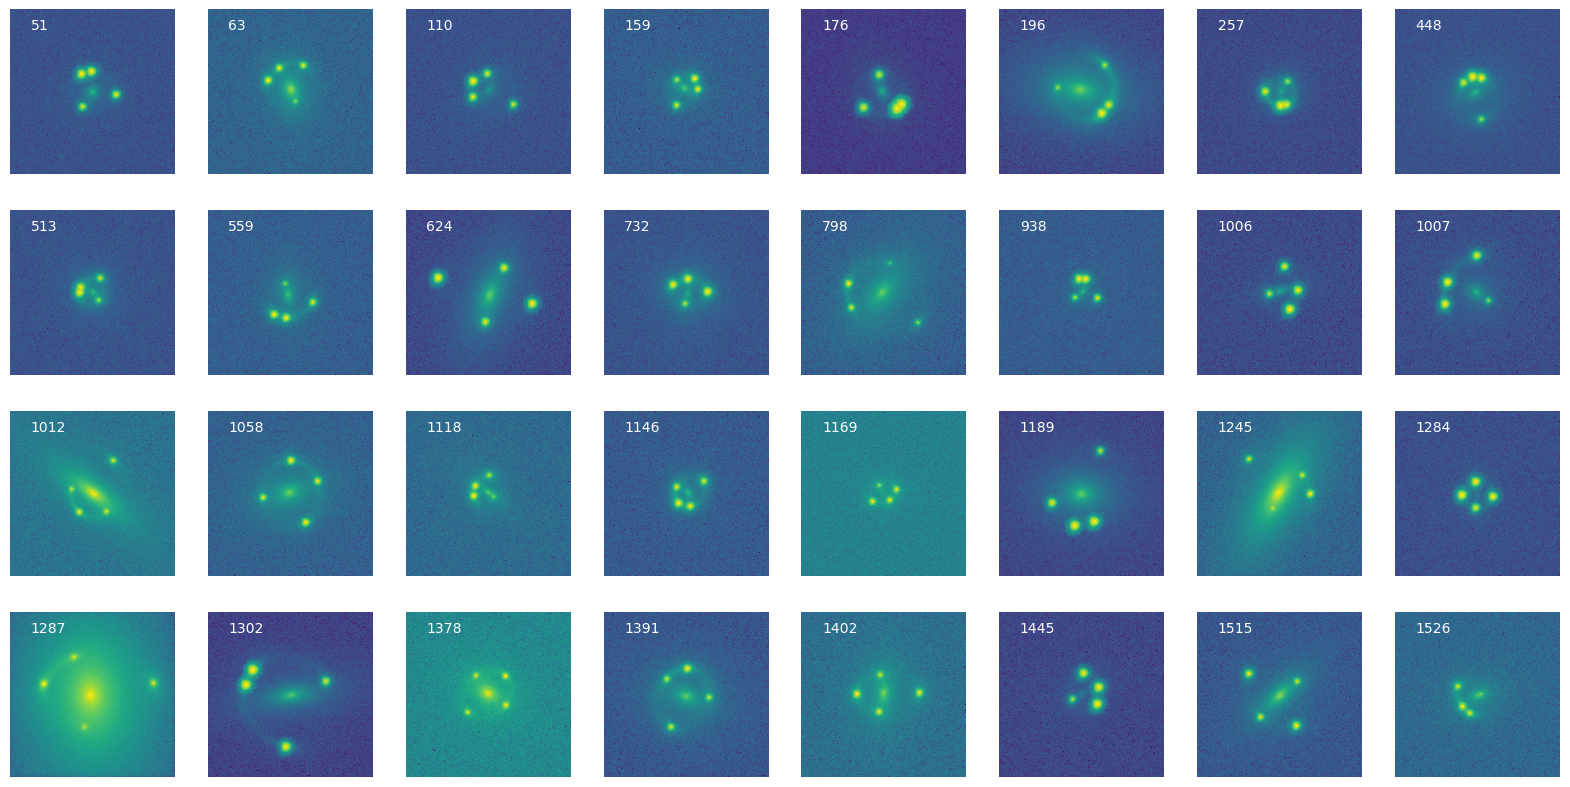

In [287]:
from astropy.visualization import simple_norm

jwst_cands = [  51 ,  63 , 110 , 159 , 176 , 196 , 257  ,448 , 513 , 559 , 624 , 732 , 798  ,938,
 1006 ,1007 ,1012 ,1058 ,1118 ,1146, 1169, 1189, 1245, 1284, 1287, 1302, 1378 ,1391,
 1402 ,1445 ,1515 ,1526]

print('%d lenses avail'%(len(jwst_cands)))

with h5py.File('DataVectors/gold/image_models.h5','r') as h5:
    print(h5.keys())
    images_cidxs = h5['catalog_idx'][:]
    gold_images = h5['images_array'][:]

# select random 600 images
fig,axs = plt.subplots(4,8,figsize=(20,10))
counter = 0
for i in range(0,4):
    for j in range(0,8):
        chosen_idx = np.where(images_cidxs == jwst_cands[counter])
        if counter == 0:
            norm = simple_norm(gold_images[chosen_idx][0],stretch='log',min_cut=1e-6)
        axs[i,j].imshow(gold_images[chosen_idx][0],norm=norm)
        axs[i,j].axis('off')
        axs[i,j].text(20,20,jwst_cands[counter],color='white')
        counter+=1

### Visualize D_ds as a function of lens and source redshift ###

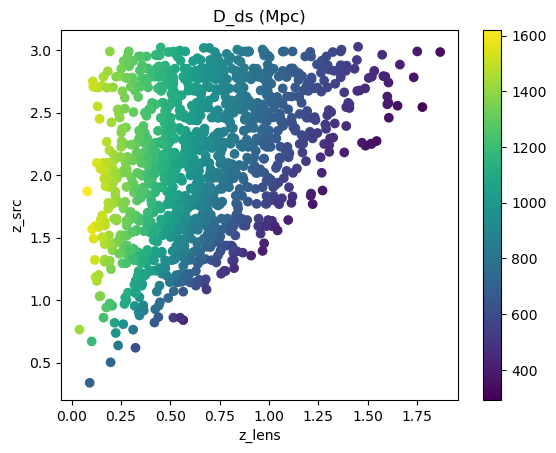

In [24]:
from scipy.stats import norm
from astropy.cosmology import FlatLambdaCDM
gt_cosmo = FlatLambdaCDM(H0=70.,Om0=0.3)

truth_df = pd.read_csv('DataVectors/gold/truth_metadata.csv')

all_z_src = truth_df['source_parameters_z_source'].to_numpy()
all_z_lens = truth_df['lens_light_parameters_z_source'].to_numpy()
all_D_ds = np.array(gt_cosmo.angular_diameter_distance_z1z2(all_z_lens,all_z_src))

plt.figure()
plt.scatter(all_z_lens,all_z_src,c=all_D_ds)
plt.xlabel('z_lens')
plt.ylabel('z_src')
plt.title('D_ds (Mpc)')
plt.colorbar()

### Check Gaussian approximation for p($\Delta \phi$,$\sqrt{J}$, $\beta_{ani}$ | $d_{img}$, $\nu_{int}$) ###

INFO:matplotlib.mathtext:Substituting symbol J from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol J from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol J from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol J from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol J from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol J from STIXNonUnicode


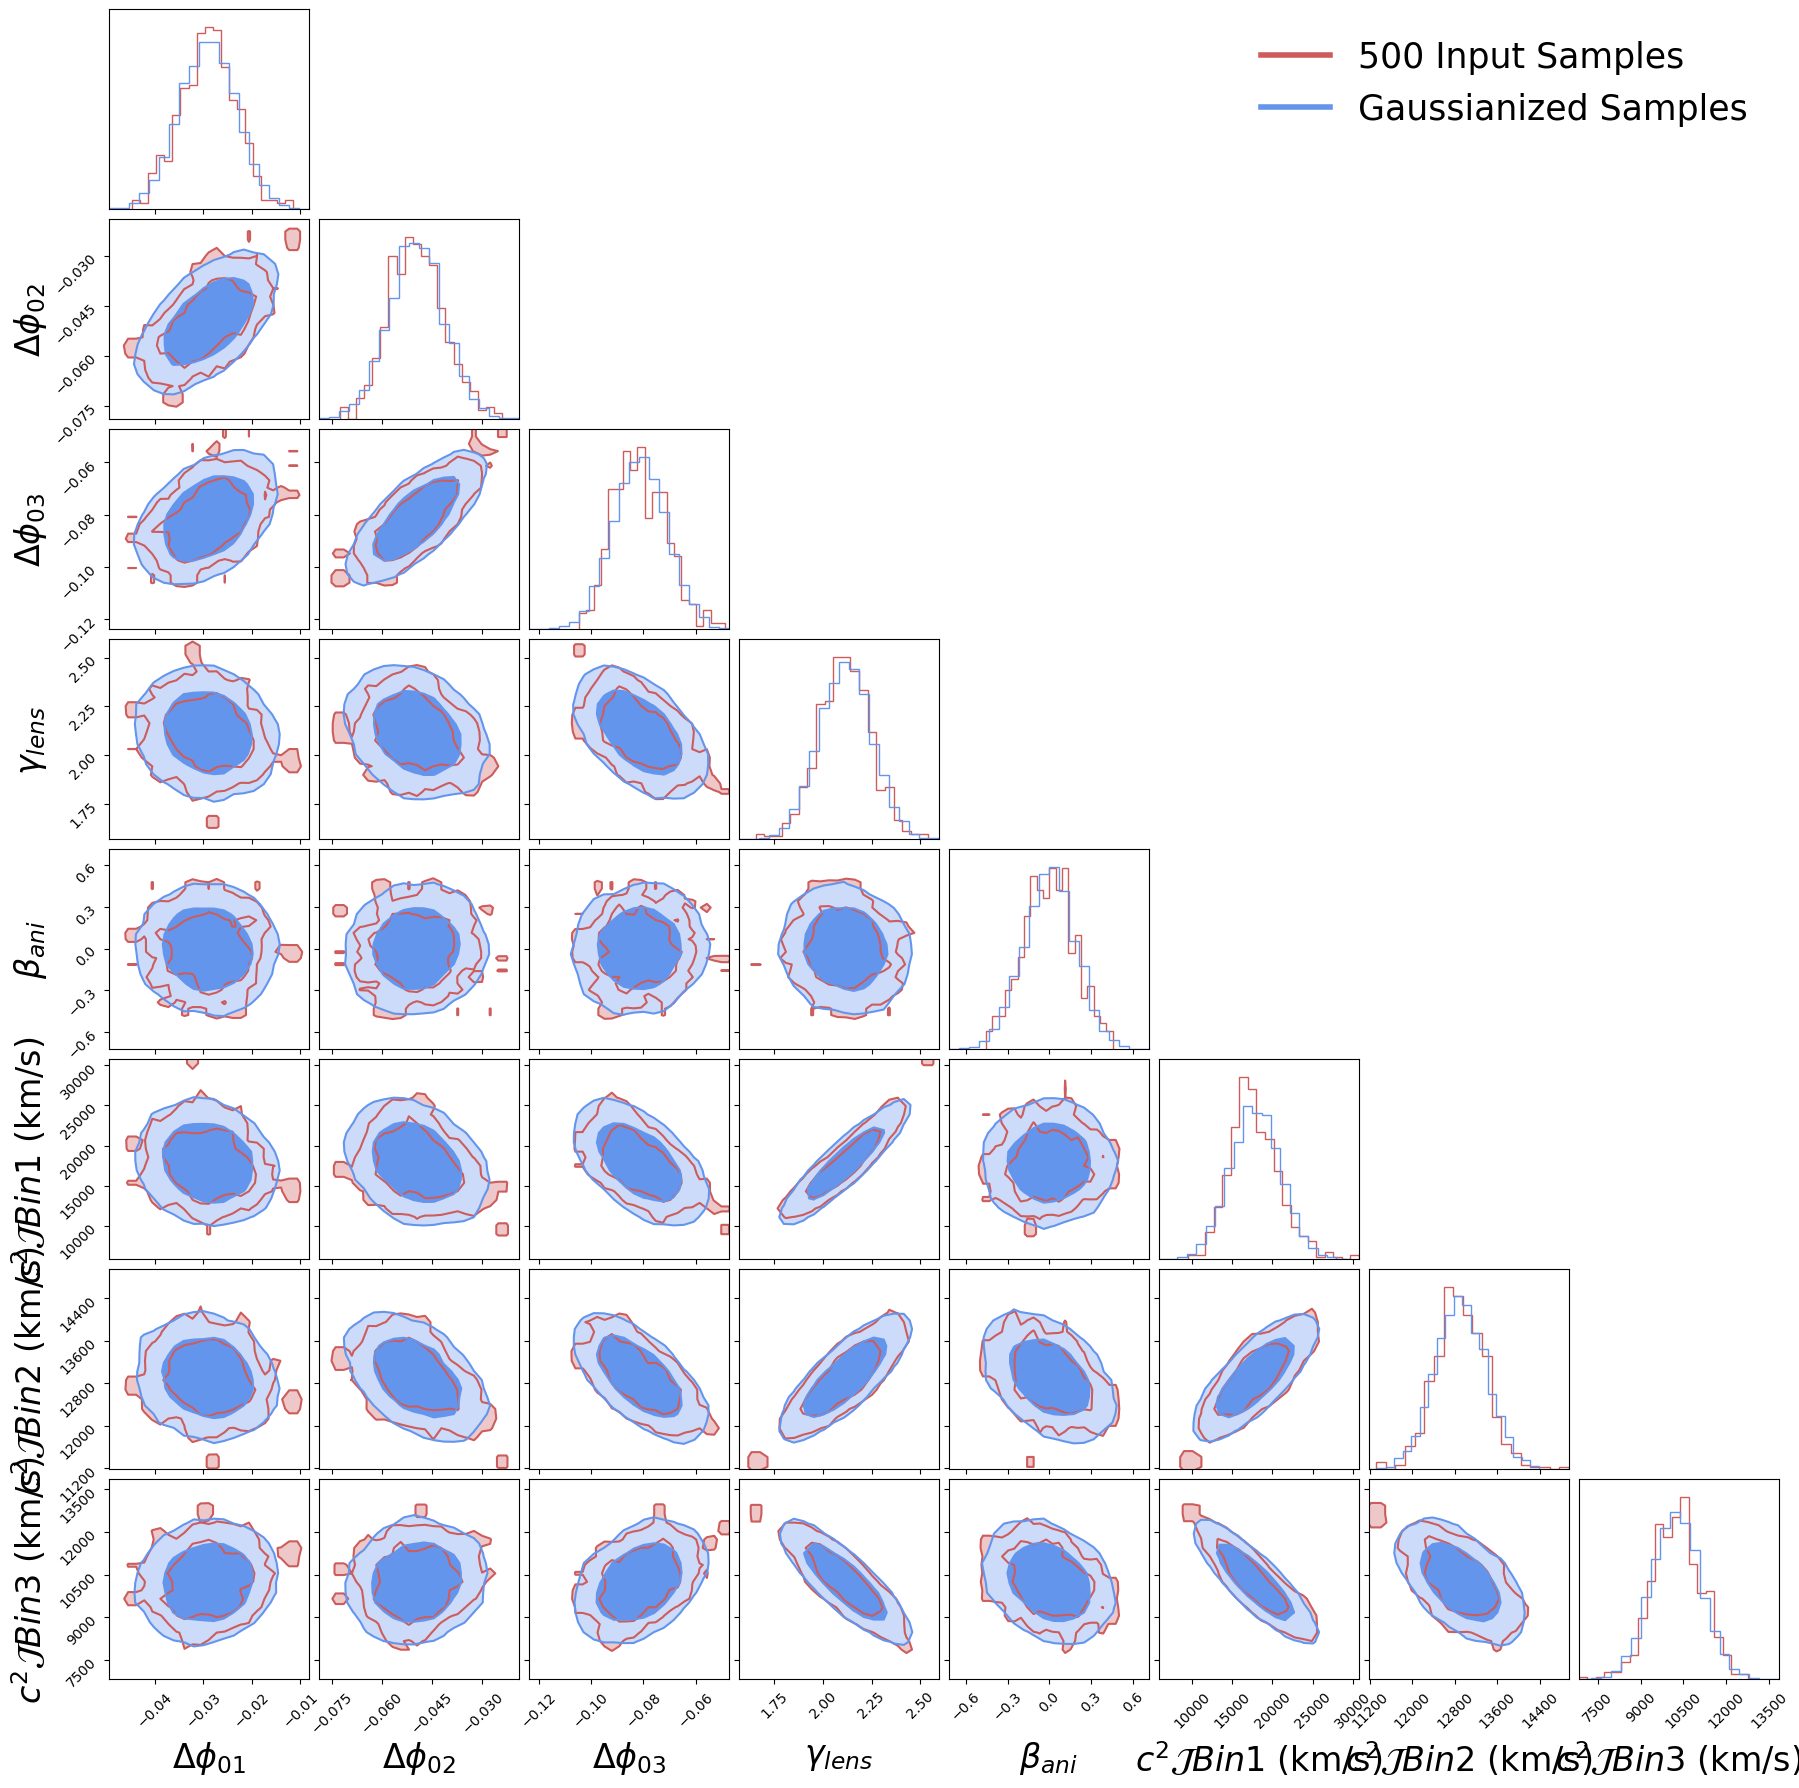

In [22]:
LENS_IDX = 2

from DataVectors.prep_data_vectors import gaussianize_samples

posteriors_h5_file = 'DataVectors/gold/quad_posteriors_KIN.h5'
kinematic_type = 'MUSE'
num_gaussianized_samps = 5000
# load in from posteriors file
with h5py.File(posteriors_h5_file, "r") as h5:

    # set-up indexing
    h5_catalog_idxs = h5['catalog_idxs'][:]
    my_idxs = np.arange(0,len(h5_catalog_idxs))

    fpd_samps = h5['fpd_samps'][my_idxs]
    lens_param_samps = h5['lens_param_samps'][my_idxs]
    beta_ani_samps = h5['beta_ani_samps'][my_idxs]
    h5_catalog_idxs = h5['catalog_idxs'][my_idxs]

    # pull c_sqrtJ_samps based on kinematic type
    if kinematic_type is not None:
        if kinematic_type == '4MOST':
            c_sqrtJ_samps = h5['c_sqrtJ_samps'][my_idxs]
        elif kinematic_type == 'MUSE':
            c_sqrtJ_samps = h5['MUSE_c_sqrtJ_samps'][my_idxs]
        elif kinematic_type == 'NIRSPEC':
            c_sqrtJ_samps = h5['NIRSPEC_c_sqrtJ_samps'][my_idxs]
        else:
            raise ValueError("kinematic_type not supported")
        
        num_kin_bins = np.shape(c_sqrtJ_samps)[-1]

num_lenses = np.shape(fpd_samps)[0]
num_td = np.shape(fpd_samps)[-1]
if num_gaussianized_samps is not None:
    to_gaussianize_input = []
    # fpds
    for i in range(0,num_td):
        to_gaussianize_input.append(fpd_samps[:,:,i])
    # gamma_lens
    to_gaussianize_input.append(lens_param_samps[:,:,3])
    gamma_idx = num_td
    if kinematic_type is not None:
        # beta_ani
        to_gaussianize_input.append(beta_ani_samps)
        beta_idx = num_td+1
        # sigma_v bins
        for j in range(0,num_kin_bins):
            to_gaussianize_input.append(c_sqrtJ_samps[:,:,j]**2)

    to_gaussianize_input = np.asarray(to_gaussianize_input)
    # switch 1st dim to last dim (parameters dim)
    input_samps = np.transpose(to_gaussianize_input,axes=(1,2,0))
    # now gaussianize
    gaussian_samps = np.empty((num_lenses,
        num_gaussianized_samps,np.shape(input_samps)[-1]))
    for l_idx in range(0,num_lenses):
        gaussian_samps[l_idx] = gaussianize_samples(
            input_samps[l_idx],num_gaussianized_samps)

# deal with edge cases of 1 td, 1 kinematic bin
# 1 td
gaussian_fpd_samps = gaussian_samps[:,:,0:num_td]
#if num_td == 1:
#    gaussian_fpd_samps = gaussian_fpd_samps[:,:,np.newaxis]
# 1 kin bin
if kinematic_type is not None:
    gaussian_kin_samps = gaussian_samps[:,:,-num_kin_bins:]


figure = corner.corner(input_samps[LENS_IDX],plot_datapoints=False,
    color='indianred',levels=[0.68,0.95],fill_contours=True,
    labels= ['$\Delta \phi_{01}$','$\Delta \phi_{02}$',
        '$\Delta \phi_{03}$','$\gamma_{lens}$', r'$\beta_{ani}$',
        '$c^2 \mathcal{J} Bin1$ (km/s)','$c^2 \mathcal{J} Bin2$ (km/s)',
        '$c^2 \mathcal{J} Bin3$ (km/s)'],
    dpi=300,fig=None,label_kwargs={'fontsize':24},smooth=0.7,hist_kwargs={'density':True})

figure = corner.corner(gaussian_samps[LENS_IDX],plot_datapoints=False,
    color='cornflowerblue',levels=[0.68,0.95],fill_contours=True,
    labels= ['$\Delta \phi_{01}$','$\Delta \phi_{02}$',
        '$\Delta \phi_{03}$','$\gamma_{lens}$', r'$\beta_{ani}$',
        '$c^2 \mathcal{J} Bin1$ (km/s)','$c^2 \mathcal{J} Bin2$ (km/s)',
        '$c^2 \mathcal{J} Bin3$ (km/s)'],
    dpi=300,fig=figure,label_kwargs={'fontsize':24},smooth=0.7,hist_kwargs={'density':True})



custom_lines = [Line2D([0], [0], color='indianred', lw=4),Line2D([0], [0], color='cornflowerblue', lw=4)]
custom_labels = ['500 Input Samples', 'Gaussianized Samples']

"""
axes = np.array(figure.axes).reshape((3, 3))
bounds = [[63,77],[1.91,2.095],[0.0,0.2]]
for r in range(0,3):
        for c in range(0,r+1):
            if bounds is not None:
                axes[r,c].set_xlim(bounds[c])
                if r != c :
                    axes[r,c].set_ylim(bounds[r])

axes = np.array(figure.axes).reshape((3, 3))
"""
n_params = np.shape(gaussian_samps)[-1]
axes = np.array(figure.axes).reshape((n_params, n_params))
axes[0,n_params-1].legend(custom_lines,custom_labels,frameon=False,fontsize=25)